In [2]:
from pygooglenews import GoogleNews
import pandas as pd
import numpy as np
import json
import time
import matplotlib.pyplot as plt

# 1 Data collection

## 1.1 Stock price, volumn 

In [4]:
df_stock = pd.read_csv("DIS.csv")
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y').astype(str)
df_stock.set_index("Date", inplace=True)
df_stock

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  145.289993  148.199997  145.100006  148.199997  148.199997   
2020-01-03  146.399994  147.899994  146.050003  146.500000  146.500000   
2020-01-06  145.539993  146.029999  144.309998  145.649994  145.649994   
2020-01-07  145.990005  146.869995  145.419998  145.699997  145.699997   
2020-01-08  145.490005  146.130005  144.820007  145.399994  145.399994   
...                ...         ...         ...         ...         ...   
2022-06-27   98.220001   98.230003   95.800003   96.610001   96.610001   
2022-06-28   99.739998  100.400002   95.779999   95.919998   95.919998   
2022-06-29   95.949997   96.199997   94.529999   95.650002   95.650002   
2022-06-30   94.419998   95.440002   92.540001   94.400002   94.400002   
2022-07-01   94.239998   96.309998   93.980003   96.139999   96.139999   

              Volume  
Date                  
2020-01-02   9502100  
2020-01-03   7320200  
2020-01-06   8262500  
2020-01-07   6906500  
2020-01-08   6984200  
...              ...  
2022-06-27  10793700  
2022-06-28  16812400  
2022-06-29   8653200  
2022-06-30  10983500  
2022-07-01  10536400  

[630 rows x 6 columns]

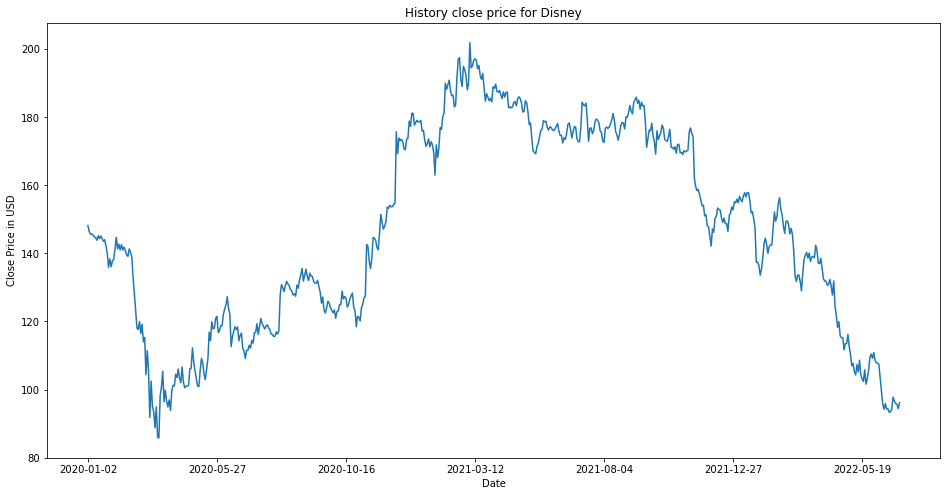

In [5]:
#show the history price
plt.figure(figsize=(16,8))
plt.title('History close price for Disney')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
df_stock['Close'].plot()
plt.show()

## Add some indicators

In [6]:
#20 days SMA (simple moving average) column
df_stock['SMA_20'] = df_stock['Close'].rolling(window = 20, min_periods = 1).mean()
#50 days SMA (simple moving average) column
df_stock['SMA_50'] = df_stock['Close'].rolling(window = 50, min_periods = 1).mean()
#EMA
df_stock['EMA10'] = df_stock['Close'].ewm(span=10, adjust=False).mean()
#30 days SMA for volume
df_stock['SMA_volume'] = df_stock['Volume'].rolling(window = 30, min_periods = 1).mean()

In [7]:
df_stock

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  145.289993  148.199997  145.100006  148.199997  148.199997   
2020-01-03  146.399994  147.899994  146.050003  146.500000  146.500000   
2020-01-06  145.539993  146.029999  144.309998  145.649994  145.649994   
2020-01-07  145.990005  146.869995  145.419998  145.699997  145.699997   
2020-01-08  145.490005  146.130005  144.820007  145.399994  145.399994   
...                ...         ...         ...         ...         ...   
2022-06-27   98.220001   98.230003   95.800003   96.610001   96.610001   
2022-06-28   99.739998  100.400002   95.779999   95.919998   95.919998   
2022-06-29   95.949997   96.199997   94.529999   95.650002   95.650002   
2022-06-30   94.419998   95.440002   92.540001   94.400002   94.400002   
2022-07-01   94.239998   96.309998   93.980003   96.139999   96.139999   

              Volume      SMA_20      SMA_50       EMA10    SMA_volume  
Date                                                                    
2020-01-02   9502100  148.199997  148.199997  148.199997  9.502100e+06  
2020-01-03   7320200  147.349998  147.349998  147.890907  8.411150e+06  
2020-01-06   8262500  146.783330  146.783330  147.483468  8.361600e+06  
2020-01-07   6906500  146.512497  146.512497  147.159201  7.997825e+06  
2020-01-08   6984200  146.289996  146.289996  146.839345  7.795100e+06  
...              ...         ...         ...         ...           ...  
2022-06-27  10793700  101.203000  107.883400   96.707420  1.229505e+07  
2022-06-28  16812400  100.533000  107.192400   96.564252  1.229604e+07  
2022-06-29   8653200   99.793500  106.550000   96.398025  1.218470e+07  
2022-06-30  10983500   99.054000  105.800000   96.034748  1.215589e+07  
2022-07-01  10536400   98.317500  105.231400   96.053884  1.211397e+07  

[630 rows x 10 columns]

## 1.2 News collection: google news

In [8]:
df_news = pd.DataFrame(index = df_stock.index)
df_news['disneyland'] = np.nan
df_news['disneyplus'] = np.nan

In [9]:
def dailyNews(date, next_date, disney_query):
    gn = GoogleNews()
    search = gn.search(query=disney_query, helper = True, from_ = date, to_ = next_date, proxies=None, scraping_bee=None)
    #print(search)
    result = ''
    for entry in search["entries"]:
        #print(entry["title"])
        result += entry["title"] +' '
    return result

In [10]:
for i in range(len(df_news)-1):
    disneyland_topic = 'intitle:disney -plus'
    disneyplus_topic = 'intitle:disney plus'
    disneyland_news = dailyNews(df_news.index[i], df_news.index[i+1], disneyland_topic)
    disneyplus_news = dailyNews(df_news.index[i], df_news.index[i+1], disneyplus_topic)
    df_news.iloc[i,0] = disneyland_news
    df_news.iloc[i,1] = disneyplus_news


/Users/xuwenquan/opt/anaconda3/lib/python3.8/site-packages/dateparser/date_parser.py:37: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


In [11]:
df_news.to_csv('news.csv')  

# 2. Sentiment analysis

## 2.1 Data pre-processing

In [13]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download("stopwords")
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/xuwenquan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xuwenquan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xuwenquan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xuwenquan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
news = pd.read_csv("news.csv")
news.set_index("Date", inplace=True)
news.drop(news.tail(1).index,inplace=True) #delete last row, which is date 07/01

In [15]:
def clean(news):
    clean_news = []
    for sequence in news:
        items = str(sequence).split()
        word_only = [word for word in items if word.isalpha()] #only keep alphabetic words 
        word_lower = [word.lower() for word in word_only]
        stopword = set(stopwords.words('english')) #get english stop words
        clean_words = [word for word in word_lower if word not in stopword]
        clean_sequence = ' '.join(clean_words)
        clean_news.append(clean_sequence)
    return clean_news
        

In [16]:
# POS tagger dictonary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(news):
    pos_list = []
    for sequence in news:
        tags = pos_tag(word_tokenize(sequence))
        pos = []
        for word, tag in tags:
            pos.append(tuple([word, pos_dict.get(tag[0])]))
        pos_list.append(pos)
    return pos_list


### Lemmatization

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatizer(news_pos):
    lemma_list = []
    for sequence in news_pos:
        lemma_news = " "
        for word, pos in sequence:
            if not pos:
                lemma = word
                lemma_news = lemma_news + " " + lemma
            else:
                lemma = WordNetLemmatizer().lemmatize(word, pos=pos)
                lemma_news = lemma_news + " " + lemma
        lemma_list.append(lemma_news)
    return lemma_list

In [18]:
def get_cleanNews(news):
    news["disneyland_cleaned"] = clean(news.disneyland)
    news["disneyplus_cleaned"] = clean(news.disneyplus)
    
    news["disneyland_pos"] = token_stop_pos(news.disneyland_cleaned)
    news["disneyplus_pos"] = token_stop_pos(news.disneyplus_cleaned)
    
    news["disneyland_lemma"] = lemmatizer(news.disneyland_pos)
    news["disneyplus_lemma"] = lemmatizer(news.disneyplus_pos)
    
    return news

news = get_cleanNews(news)
news.to_csv('news_cleaned.csv') 

## 2.2 Use Textblob to analysis the cleaned news

In [19]:
news_cleaned = pd.read_csv("news_cleaned.csv")
news_cleaned.set_index("Date", inplace=True)

In [20]:
news_cleaned

disneyland  \
Date                                                            
2020-01-02  This Trick Helps Score Last-Minute FastPasses ...   
2020-01-03  New at Disney World and Disneyland in 2020: Av...   
2020-01-06  Full List of Participating Disney and Wondergr...   
2020-01-07  7 drink deals worth seeking out at Walt Disney...   
2020-01-08  Disney Aspire Adds Purdue University Global an...   
...                                                       ...   
2022-06-24  10 Best Disney Movies Turning 10 In 2022 - Col...   
2022-06-27  Disney Springs Brightline Station Cancelled, W...   
2022-06-28  Disney extends CEO Bob Chapek's contract by th...   
2022-06-29  Disney extends CEO Bob Chapek’s contract for t...   
2022-06-30  "$5000 'Star Wars' Cocktail Should Be Illegal,...   

                                                   disneyplus  \
Date                                                            
2020-01-02  Movies are quietly disappearing from Disney Pl...   
2020-01-03  'Home Alone' and some Marvel movies are missin...   
2020-01-06  Disney Plus Review: Great Content, Bad Technol...   
2020-01-07  'Maleficent 2' on Disney Plus: When Will the M...   
2020-01-08  Thunderbolts Disney Plus Series May Be On Its ...   
...                                                       ...   
2022-06-24  The Best Disney Plus Movies You Haven't Seen -...   
2022-06-27  50 Best Movies on Disney Plus - Most Enjoyable...   
2022-06-28  7 ways to troubleshoot Error Code 42 on Disney...   
2022-06-29  Disney Plus mutes exclusive streaming deal wit...   
2022-06-30  Disney Plus Is Not Treating Its Marvel Or Star...   

                                           disneyland_cleaned  \
Date                                                            
2020-01-02  trick helps score fastpasses reservations disn...   
2020-01-03  new disney world disneyland avengers epcot upd...   
2020-01-06  full list participating disney wonderground ga...   
2020-01-07  drink deals worth seeking walt disney world ta...   
2020-01-08  disney aspire adds purdue university global so...   
...                                                       ...   
2022-06-24  best disney movies turning collider disney off...   
2022-06-27  disney springs brightline station disliked hau...   
2022-06-28  disney extends ceo bob contract three years cn...   
2022-06-29  disney extends ceo bob contract three years de...   
2022-06-30  cocktail fans slam costly drink inside magic d...   

                                           disneyplus_cleaned  \
Date                                                            
2020-01-02  movies quietly disappearing disney plus polygo...   
2020-01-03  marvel movies missing disney plus business ins...   
2020-01-06  disney plus great bad technology forbes movies...   
2020-01-07  disney movie newsweek timmy failure movie trai...   
2020-01-08  thunderbolts disney plus series may way cosmic...   
...                                                       ...   
2022-06-24  best disney plus movies seen screencrush new j...   
2022-06-27  best movies disney plus enjoyable movies healt...   
2022-06-28  ways troubleshoot error code disney plus busin...   
2022-06-29  disney plus mutes exclusive streaming deal yes...   
2022-06-30  disney plus treating marvel star wars tv shows...   

                                               disneyland_pos  \
Date                                                            
2020-01-02  [('trick', 'n'), ('helps', 'v'), ('score', 'v'...   
2020-01-03  [('new', 'a'), ('disney', 'n'), ('world', 'n')...   
2020-01-06  [('full', 'a'), ('list', 'n'), ('participating...   
2020-01-07  [('drink', 'n'), ('deals', 'n'), ('worth', 'a'...   
2020-01-08  [('disney', 'n'), ('aspire', 'n'), ('adds', 'v...   
...                                                       ...   
2022-06-24  [('best', 'a'), ('disney', 'n'), ('movies', 'n...   
2022-06-27  [('disney', 'n'), ('springs', 'n'), ('brightli...   
2022-06-28  [('di

In [21]:
from textblob import TextBlob

#calculate polarity
def get_polarity(news):
    return TextBlob(news).sentiment.polarity

# function to analyze the reviews
def get_textblobResult(score):
    if score <= 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'

In [22]:
df_cleanedNews = pd.DataFrame(news_cleaned[['disneyland', 'disneyplus','disneyland_lemma','disneyplus_lemma']])

df_cleanedNews['disneyland_Polarity'] = df_cleanedNews['disneyland_lemma'].apply(get_polarity) 
df_cleanedNews['disneyland_textResult'] = df_cleanedNews['disneyland_Polarity'].apply(get_textblobResult)

df_cleanedNews['disneyplus_Polarity'] = df_cleanedNews['disneyplus_lemma'].apply(get_polarity) 
df_cleanedNews['disneyplus_textResult'] = df_cleanedNews['disneyplus_Polarity'].apply(get_textblobResult)

## 2.2 Use VADER to analysis the cleaned news

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

#get vader sentiment compound score
def get_vaderScore(news):
    score = vader.polarity_scores(news)
    return score['compound']

# function to analyse
def get_vaderResult(score):
    if score >= 0.05:
        return 'Positive'
    else:
        return 'Negative'

In [24]:
df_cleanedNews['disneyland_Vader'] = df_cleanedNews['disneyland_lemma'].apply(get_vaderScore) 
df_cleanedNews['disneyland_Vader_Result'] = df_cleanedNews['disneyland_Vader'].apply(get_vaderResult)

df_cleanedNews['disneyplus_Vader'] = df_cleanedNews['disneyplus_lemma'].apply(get_vaderScore) 
df_cleanedNews['disneyplus_Vader_Result'] = df_cleanedNews['disneyplus_Vader'].apply(get_vaderResult)

In [25]:
df_cleanedNews.head()

disneyland  \
Date                                                            
2020-01-02  This Trick Helps Score Last-Minute FastPasses ...   
2020-01-03  New at Disney World and Disneyland in 2020: Av...   
2020-01-06  Full List of Participating Disney and Wondergr...   
2020-01-07  7 drink deals worth seeking out at Walt Disney...   
2020-01-08  Disney Aspire Adds Purdue University Global an...   

                                                   disneyplus  \
Date                                                            
2020-01-02  Movies are quietly disappearing from Disney Pl...   
2020-01-03  'Home Alone' and some Marvel movies are missin...   
2020-01-06  Disney Plus Review: Great Content, Bad Technol...   
2020-01-07  'Maleficent 2' on Disney Plus: When Will the M...   
2020-01-08  Thunderbolts Disney Plus Series May Be On Its ...   

                                             disneyland_lemma  \
Date                                                            
2020-01-02    trick help score fastpasses reservation disn...   
2020-01-03    new disney world disneyland avenger epcot up...   
2020-01-06    full list participate disney wonderground ga...   
2020-01-07    drink deal worth seek walt disney world tamp...   
2020-01-08    disney aspire add purdue university global s...   

                                             disneyplus_lemma  \
Date                                                            
2020-01-02    movie quietly disappear disney plus polygon ...   
2020-01-03    marvel movie miss disney plus business insid...   
2020-01-06    disney plus great bad technology forbes movi...   
2020-01-07    disney movie newsweek timmy failure movie tr...   
2020-01-08    thunderbolt disney plus series may way cosmi...   

            disneyland_Polarity disneyland_textResult  disneyplus_Polarity  \
Date                                                                         
2020-01-02             0.168182              Positive             0.257143   
2020-01-03             0.178652              Positive             0.254167   
2020-01-06             0.156744              Positive             0.160000   
2020-01-07             0.206667              Positive             0.191667   
2020-01-08             0.130594              Positive             0.136364   

           disneyplus_textResult  disneyland_Vader disneyland_Vader_Result  \
Date                                                                         
2020-01-02              Positive            0.9493                Positive   
2020-01-03              Positive            0.9758                Positive   
2020-01-06              Positive            0.2500                Positive   
2020-01-07              Positive            0.9761                Positive   
2020-01-08              Positive           -0.1027                Negative   

            disneyplus_Vader disneyplus_Vader_Result  
Date                                                  
2020-01-02            0.8020                Positive  
2020-01-03            0.8807                Positive  
2020-01-06            0.7579                Positive  
2020-01-07            0.0772                Positive  
2020-01-08           -0.0258                Negative

## 2.4 Combine Textblob and Vader to compute the result 

In [26]:
def combine(result1,result2):
    
    if result1 == 'Positive':
        result1 = 1
    else:
        result1 = 0
        
    if result2 == 'Positive':
        result2 = 1
    else:
        result2 = 0
        
    temp = bool(result1) & bool(result2)
    
    if temp == True:
        temp = 1
    else:
        temp = 0
    return temp


df_cleanedNews['disneyland_Result'] = df_cleanedNews.apply(lambda x: combine(x.disneyland_Vader_Result, x.disneyland_textResult), axis=1)
df_cleanedNews['disneyplus_Result'] = df_cleanedNews.apply(lambda x: combine(x.disneyplus_Vader_Result, x.disneyplus_textResult), axis=1)


In [27]:
df_cleanedNews.head()

disneyland  \
Date                                                            
2020-01-02  This Trick Helps Score Last-Minute FastPasses ...   
2020-01-03  New at Disney World and Disneyland in 2020: Av...   
2020-01-06  Full List of Participating Disney and Wondergr...   
2020-01-07  7 drink deals worth seeking out at Walt Disney...   
2020-01-08  Disney Aspire Adds Purdue University Global an...   

                                                   disneyplus  \
Date                                                            
2020-01-02  Movies are quietly disappearing from Disney Pl...   
2020-01-03  'Home Alone' and some Marvel movies are missin...   
2020-01-06  Disney Plus Review: Great Content, Bad Technol...   
2020-01-07  'Maleficent 2' on Disney Plus: When Will the M...   
2020-01-08  Thunderbolts Disney Plus Series May Be On Its ...   

                                             disneyland_lemma  \
Date                                                            
2020-01-02    trick help score fastpasses reservation disn...   
2020-01-03    new disney world disneyland avenger epcot up...   
2020-01-06    full list participate disney wonderground ga...   
2020-01-07    drink deal worth seek walt disney world tamp...   
2020-01-08    disney aspire add purdue university global s...   

                                             disneyplus_lemma  \
Date                                                            
2020-01-02    movie quietly disappear disney plus polygon ...   
2020-01-03    marvel movie miss disney plus business insid...   
2020-01-06    disney plus great bad technology forbes movi...   
2020-01-07    disney movie newsweek timmy failure movie tr...   
2020-01-08    thunderbolt disney plus series may way cosmi...   

            disneyland_Polarity disneyland_textResult  disneyplus_Polarity  \
Date                                                                         
2020-01-02             0.168182              Positive             0.257143   
2020-01-03             0.178652              Positive             0.254167   
2020-01-06             0.156744              Positive             0.160000   
2020-01-07             0.206667              Positive             0.191667   
2020-01-08             0.130594              Positive             0.136364   

           disneyplus_textResult  disneyland_Vader disneyland_Vader_Result  \
Date                                                                         
2020-01-02              Positive            0.9493                Positive   
2020-01-03              Positive            0.9758                Positive   
2020-01-06              Positive            0.2500                Positive   
2020-01-07              Positive            0.9761                Positive   
2020-01-08              Positive           -0.1027                Negative   

            disneyplus_Vader disneyplus_Vader_Result  disneyland_Result  \
Date                                                                      
2020-01-02            0.8020                Positive                  1   
2020-01-03            0.8807                Positive                  1   
2020-01-06            0.7579                Positive                  1   
2020-01-07            0.0772                Positive                  1   
2020-01-08           -0.0258                Negative                  0   

            disneyplus_Result  
Date                           
2020-01-02                  1  
2020-01-03                  1  
2020-01-06                  1  
2020-01-07                  1  
2020-01-08                  0

In [76]:
sentiment = df_cleanedNews.drop(['disneyland_lemma','disneyplus_lemma','disneyland_textResult','disneyplus_textResult','disneyland_Vader_Result','disneyplus_Vader_Result','disneyland','disneyplus'], axis=1)
DIS_df =  df_stock.join(sentiment)
DIS_df.drop(DIS_df.tail(1).index,inplace=True) 

In [66]:
DIS_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  145.289993  148.199997  145.100006  148.199997  148.199997   
2020-01-03  146.399994  147.899994  146.050003  146.500000  146.500000   
2020-01-06  145.539993  146.029999  144.309998  145.649994  145.649994   
2020-01-07  145.990005  146.869995  145.419998  145.699997  145.699997   
2020-01-08  145.490005  146.130005  144.820007  145.399994  145.399994   
...                ...         ...         ...         ...         ...   
2022-06-24   95.449997   98.570000   95.400002   97.779999   97.779999   
2022-06-27   98.220001   98.230003   95.800003   96.610001   96.610001   
2022-06-28   99.739998  100.400002   95.779999   95.919998   95.919998   
2022-06-29   95.949997   96.199997   94.529999   95.650002   95.650002   
2022-06-30   94.419998   95.440002   92.540001   94.400002   94.400002   

              Volume      SMA_20      SMA_50       EMA10    SMA_volume  \
Date                                                                     
2020-01-02   9502100  148.199997  148.199997  148.199997  9.502100e+06   
2020-01-03   7320200  147.349998  147.349998  147.890907  8.411150e+06   
2020-01-06   8262500  146.783330  146.783330  147.483468  8.361600e+06   
2020-01-07   6906500  146.512497  146.512497  147.159201  7.997825e+06   
2020-01-08   6984200  146.289996  146.289996  146.839345  7.795100e+06   
...              ...         ...         ...         ...           ...   
2022-06-24  11681200  101.653000  108.598200   96.729068  1.314522e+07   
2022-06-27  10793700  101.203000  107.883400   96.707420  1.229505e+07   
2022-06-28  16812400  100.533000  107.192400   96.564252  1.229604e+07   
2022-06-29   8653200   99.793500  106.550000   96.398025  1.218470e+07   
2022-06-30  10983500   99.054000  105.800000   96.034748  1.215589e+07   

            disneyland_Polarity  disneyplus_Polarity  disneyland_Vader  \
Date                                                                     
2020-01-02             0.168182             0.257143            0.9493   
2020-01-03             0.178652             0.254167            0.9758   
2020-01-06             0.156744             0.160000            0.2500   
2020-01-07             0.206667             0.191667            0.9761   
2020-01-08             0.130594             0.136364           -0.1027   
...                         ...                  ...               ...   
2022-06-24             0.137186             0.209419            0.9977   
2022-06-27             0.154651             0.210308            0.9559   
2022-06-28             0.173178             0.113876            0.9816   
2022-06-29             0.102399             0.114967            0.9788   
2022-06-30             0.263234             0.184010            0.9867   

            disneyplus_Vader  disneyland_Result  disneyplus_Result  
Date                                                                
2020-01-02            0.8020                1.0                1.0  
2020-01-03            0.8807                1.0                1.0  
2020-01-06            0.7579                1.0                1.0  
2020-01-07            0.0772                1.0                1.0  
2020-01-08           -0.0258                0.0                0.0  
...                      ...                ...                ...  
2022-06-24            0.9960                1.0                1.0  
2022-06-27            0.9584                1.0                1.0  
2022-06-28           -0.8194                1.0                0.0  
2022-06-29            0.9885                1.0                1.0  
2022-06-30            0.9876                1.0                1.0  

[629 rows x 16 columns]

## 2.5 Data normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y = np.array(DIS_df[['Close']])
X = DIS_df.drop('Close',axis=1).values
X = scaler.fit_transform(X)

## 2.6 Train, test split for time series data

In [32]:
#for generate time series data for tarining and testing
def time_series_dataset(data_x,data_y,lookback):
    X,Y=[],[]
    for i in range(len(data_x)-lookback-1):
        a=data_x[i:(i+lookback)]
        X.append(a)
        Y.append(data_y[i+lookback])
    return np.array(X),np.array(Y)

In [33]:
def get_data(X, y):
    train_data_len = int(0.8*len(DIS_df))
    test_size=len(DIS_df)-train_data_len
    trainx,testx = X[0:train_data_len],X[train_data_len:len(DIS_df)]
    trainy,testy = y[0:train_data_len],y[train_data_len:len(DIS_df)]

    #lookback date
    lookback = 7
    X_train,y_train = time_series_dataset(trainx,trainy, lookback)
    X_test,y_test = time_series_dataset(testx, testy,lookback)
    
    return X_train,y_train,X_test,y_test

In [34]:
#training and testing data is 3 dimensional
X_train,y_train,X_test,y_test = get_data(X,y)

# 4. Model construction: Machine learning 

In [35]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [36]:
X_train_2 = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_2 = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
y_train_2 = y_train.reshape(y_train.shape[0],)
y_test_2 = y_test.reshape(y_test.shape[0],)

In [37]:
#choose the best estimator
def optimize(regressor):
    rmse_dict = {}
    for k in range(20):
        k = k+1
        model = regressor(k)
        model.fit(X_train_2, y_train_2)  
        pred = model.predict(X_test_2) 
        rmse = sqrt(mean_squared_error(y_test,pred)) #for rmse
        rmse_dict[k] = rmse
    key = min(rmse_dict, key=rmse_dict.get) #get the best estimator value
    return key

In [138]:
num_forest = optimize(RandomForestRegressor)
forest = RandomForestRegressor(num_forest)
forest.fit(X_train_2,y_train_2)

RandomForestRegressor(n_estimators=14)

In [39]:
num_k = optimize(KNeighborsRegressor)
knn = KNeighborsRegressor(num_k)
knn.fit(X_train_2, y_train_2)  

KNeighborsRegressor(n_neighbors=8)

# 5. Model construction: Deep learning 

In [40]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

## 5.1 RNN

In [41]:
from tensorflow.keras import datasets, layers, models

In [42]:
rnn = Sequential()
rnn.add(layers.SimpleRNN(64, input_shape = (X_train.shape[1],X_train.shape[2])))
rnn.add(layers.BatchNormalization())
rnn.add(layers.Dense(20))
rnn.add(layers.Dense(1))
print(rnn.summary())
rnn.compile(loss = 'mean_squared_error',optimizer = 'adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                5120      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 20)                1300      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 6,697
Trainable params: 6,569
Non-trainable params: 128
_________________________________________________________________
None


## 5.2 LSTM

In [43]:
lstm = Sequential()
lstm.add(LSTM(60,return_sequences=True, input_shape = (X_train.shape[1],X_train.shape[2])))
lstm.add(LSTM(30,return_sequences=False))
lstm.add(Dense(20))
lstm.add(Dense(1))
lstm.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [45]:
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 60)             18240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                10920     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 29,801
Trainable params: 29,801
Non-trainable params: 0
_________________________________________________________________


# 6. Evaluation

In [46]:
#fitting loss
def fit_loss(model, epochs, thetitle, batchsize):
    history = model.fit(X_train,y_train,epochs = epochs, batch_size=batchsize,verbose=0)
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'])
    plt.title(thetitle)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

In [47]:
from sklearn.metrics import r2_score

def get_metrics(X_test,model, modelname):
    pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test,pred))
    r2 = r2_score(y_test,pred)
    print("RMSE for", modelname,':', rmse)
    print("R squared for", modelname,':', r2)
    return pred, rmse, r2

In [48]:
#show prediction and real price
def price_compare(model, thetitle,pred):
    plt.figure(figsize=(16,8))
    plt.title(thetitle)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Price in USD', fontsize=18)
    plt.plot(y_test)
    plt.plot(pred)

    plt.legend(['Real','Predictions'], loc='lower right')
    plt.show()


## 6.1 Machine learning models

RMSE for Random forest : 3.9633791544501578
R squared for Random forest : 0.9577443926547321


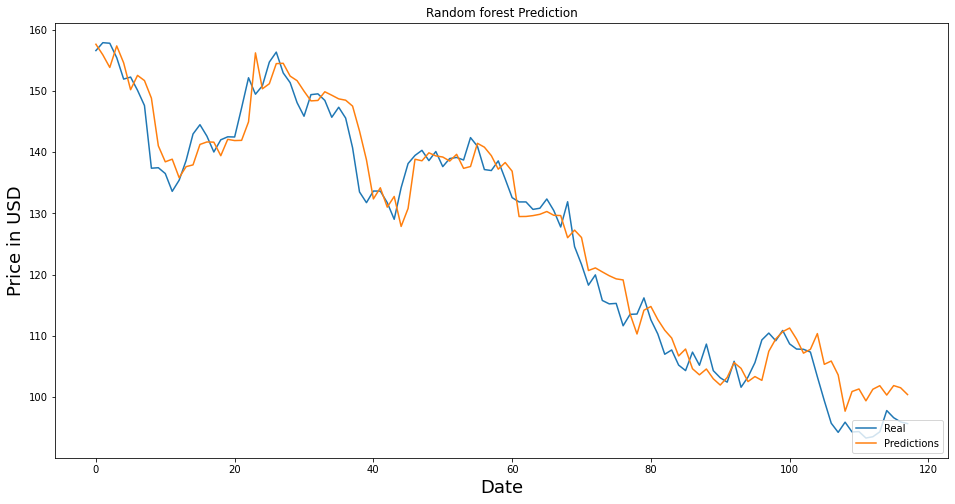

In [140]:
#forest
pred_forest = get_metrics(X_test_2,forest, 'Random forest')
price_compare(forest, 'Random forest Prediction',pred_forest[0])

RMSE for KNN : 10.518837414314968
R squared for KNN : 0.7023618534700689


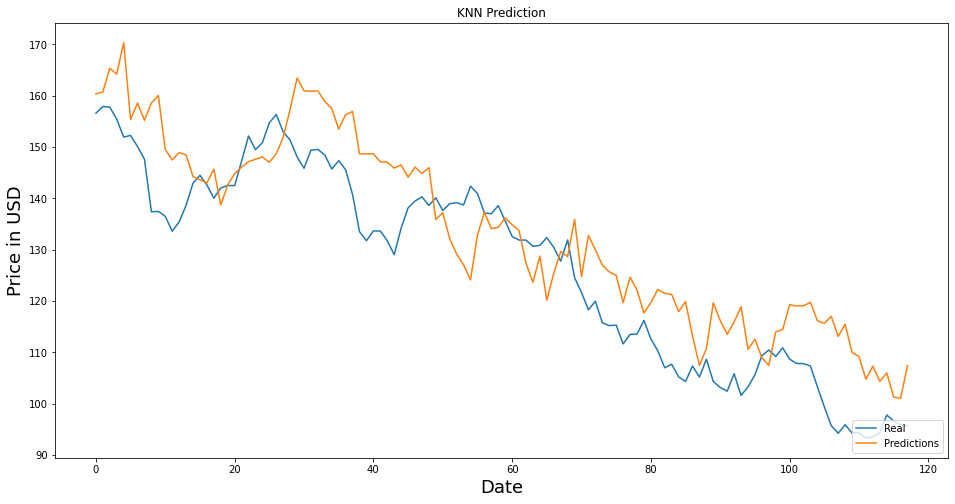

In [51]:
#knn
pred_knn = get_metrics(X_test_2,knn, 'KNN')
price_compare(knn, 'KNN Prediction',pred_knn[0])

## 6.2 Deep learning models

In [135]:
rnn_result = pd.DataFrame(columns = ['RMSE' , 'R squared'])
lstm_result = pd.DataFrame(columns = ['RMSE' , 'R squared'])
def evaluate_deep(model, modelname, result):
    for epoch in range(10,60,10):
        for batch in range(16,80,16):
            parameters = 'epoch size=' + str(epoch) +',batch size=' +str(batch)
            title_loss = modelname + ' fitting loss:' + parameters
            fit_loss(model, epoch, title_loss,batch) # 32 is the batch size
            title_pred = modelname + ' prediction:' + parameters
            print(parameters)
            pred, rmse,r2 = get_metrics(X_test,model, modelname)
            result.loc[parameters] = [rmse, r2]
            price_compare(model, title_pred, pred)
    return result
            

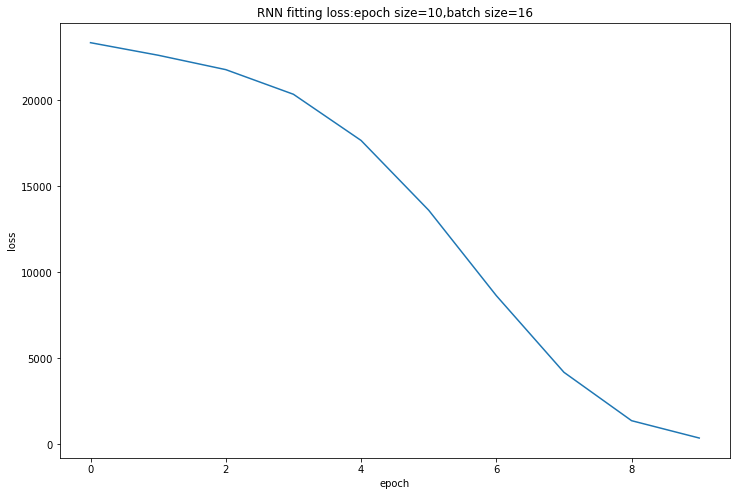

epoch size=10,batch size=16
RMSE for RNN : 23.393433265906026
R squared for RNN : -0.4721126183787505


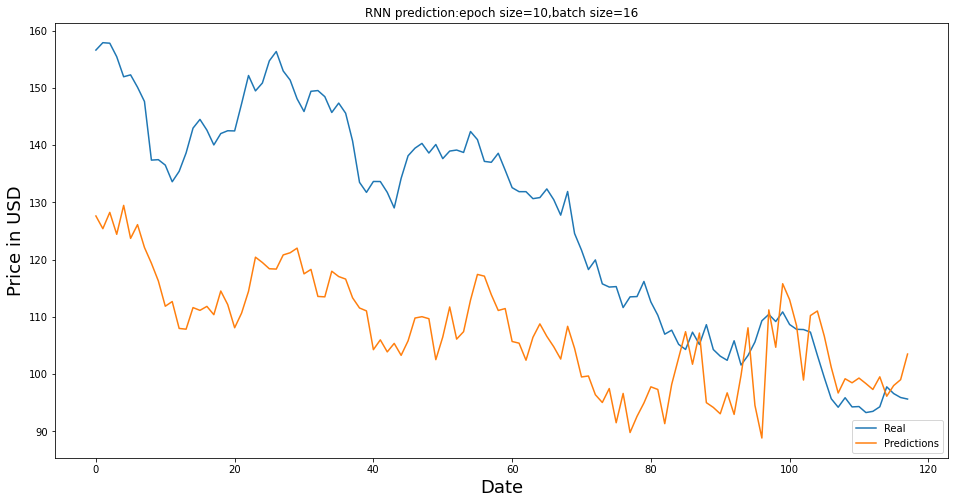

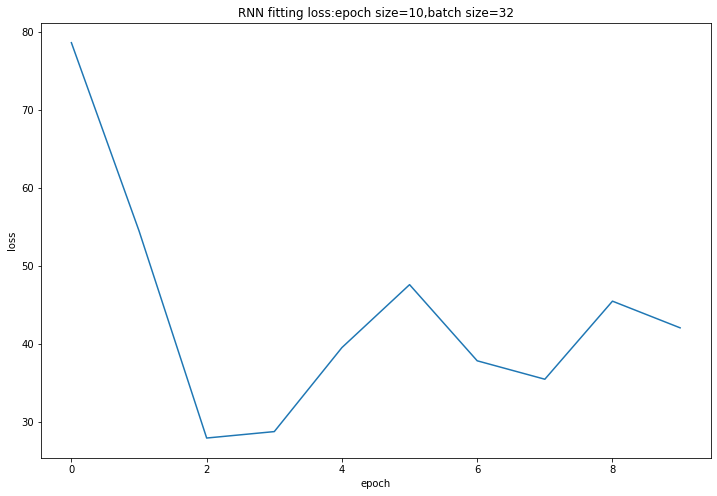

epoch size=10,batch size=32
RMSE for RNN : 7.800816614177867
R squared for RNN : 0.8363058182722056


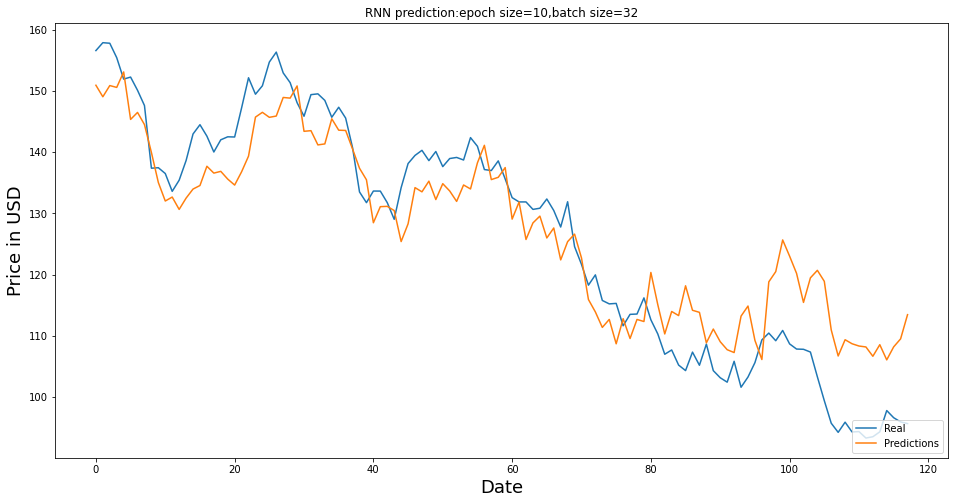

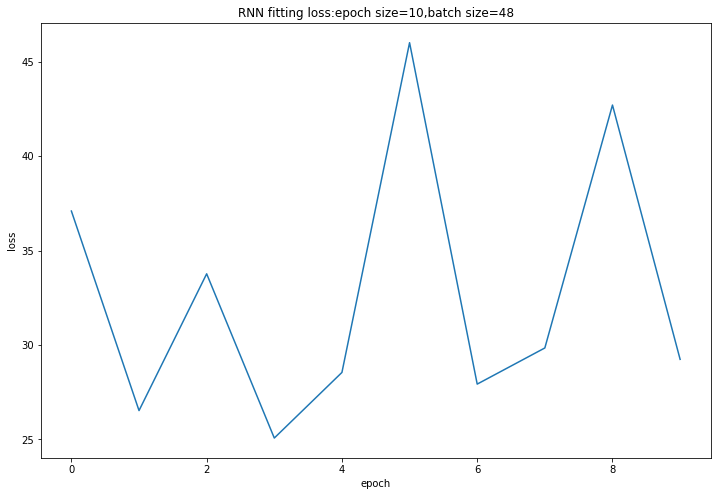

epoch size=10,batch size=48
RMSE for RNN : 5.640643777416107
R squared for RNN : 0.9144124777312987


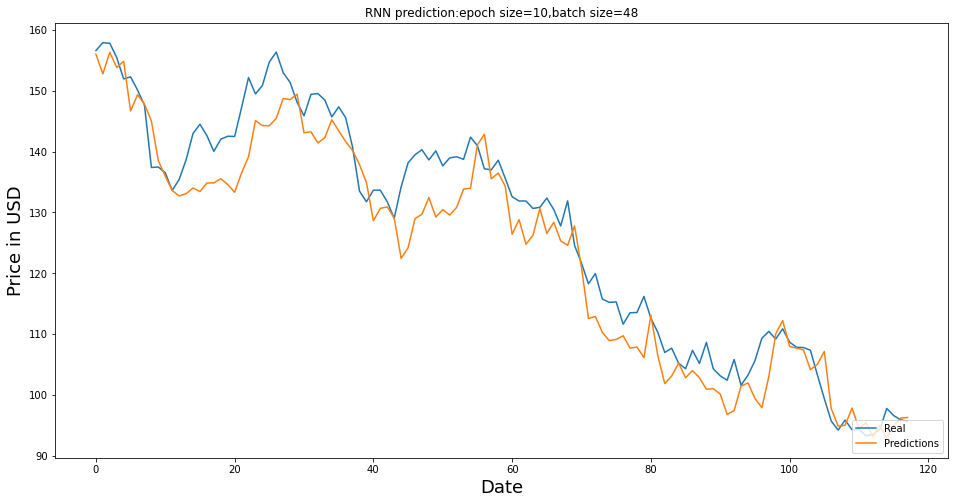

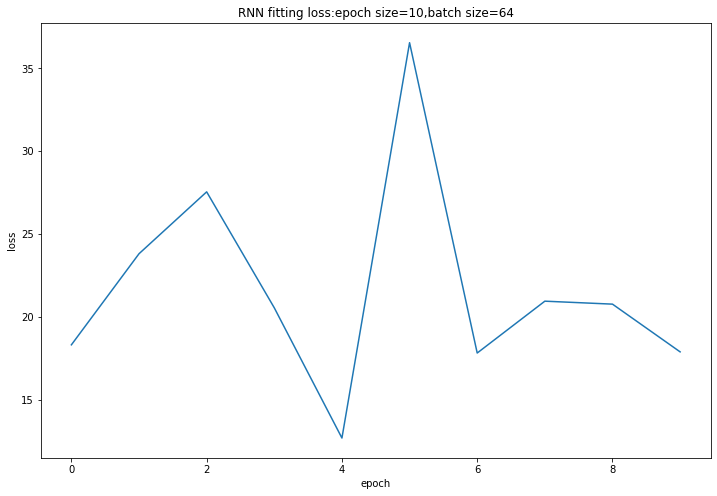

epoch size=10,batch size=64
RMSE for RNN : 4.614795078815559
R squared for RNN : 0.9427127535367279


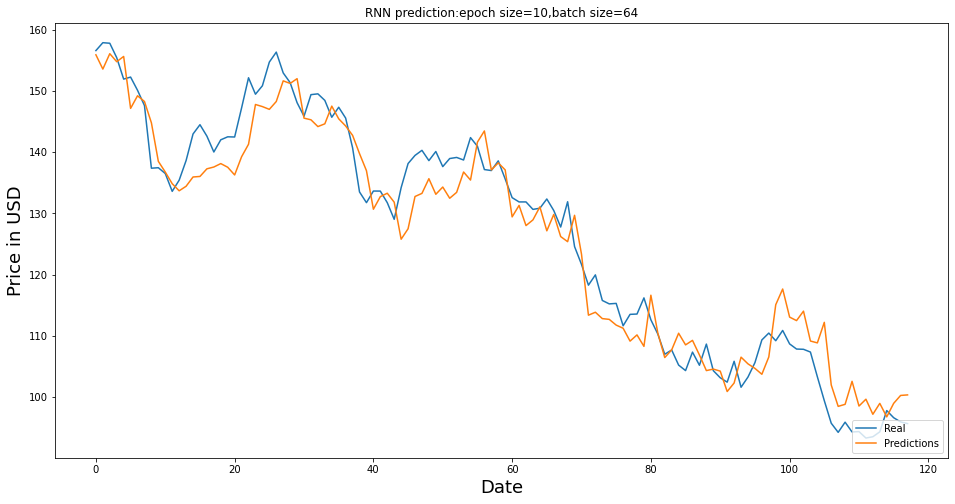

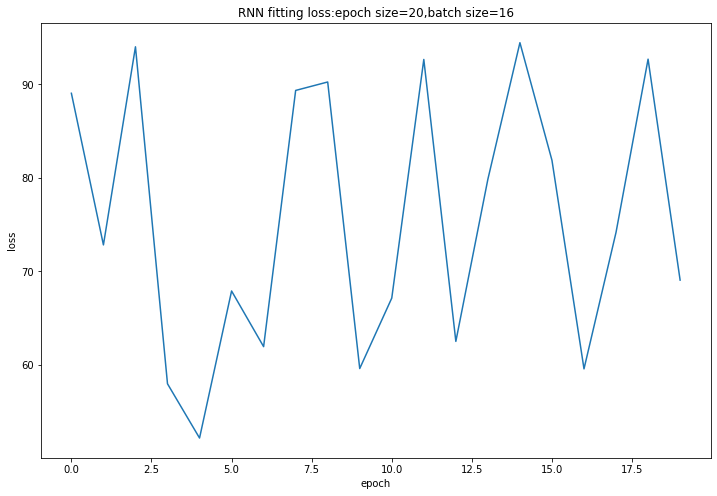

epoch size=20,batch size=16
RMSE for RNN : 5.600152040547936
R squared for RNN : 0.9156368587034445


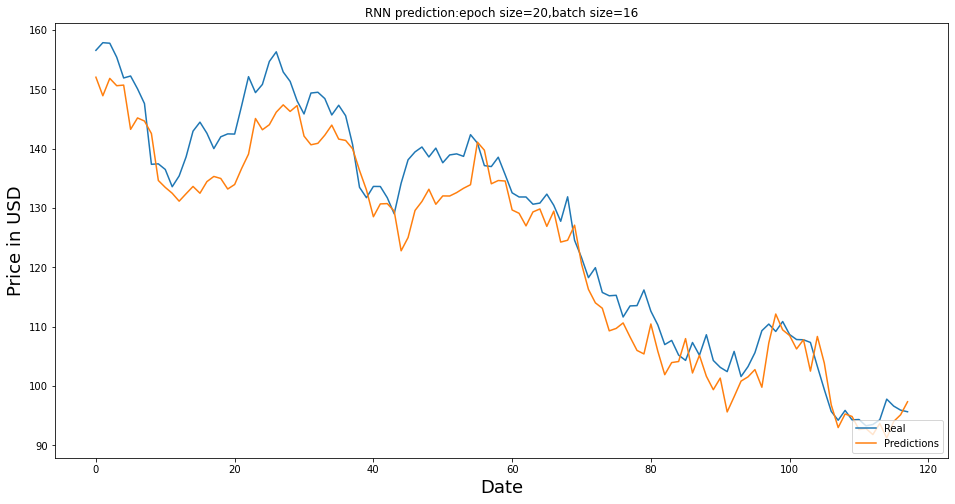

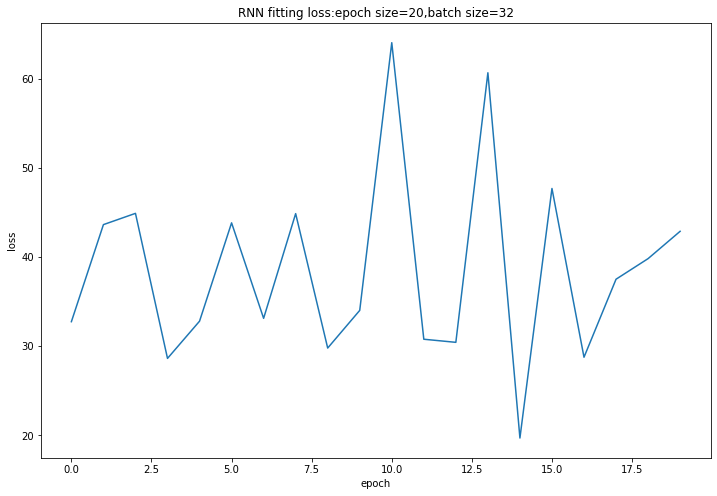

epoch size=20,batch size=32
RMSE for RNN : 5.3913026837020634
R squared for RNN : 0.9218119221479848


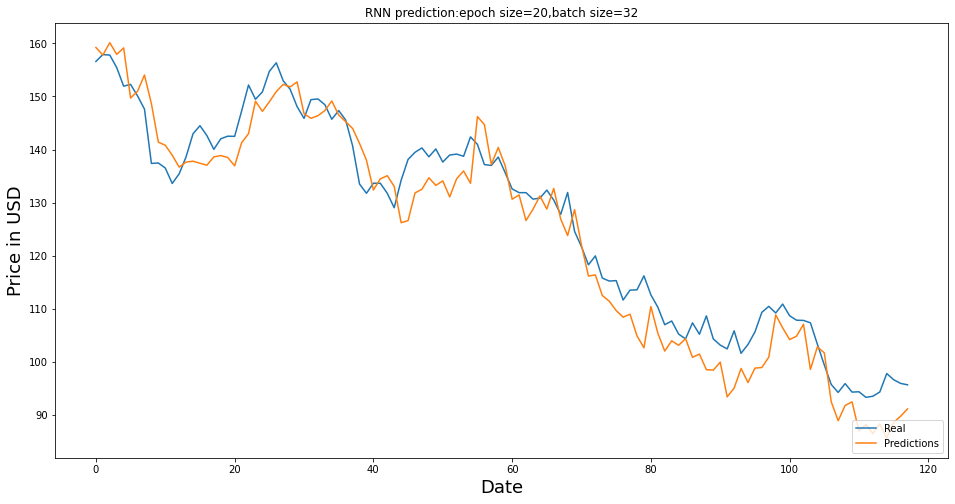

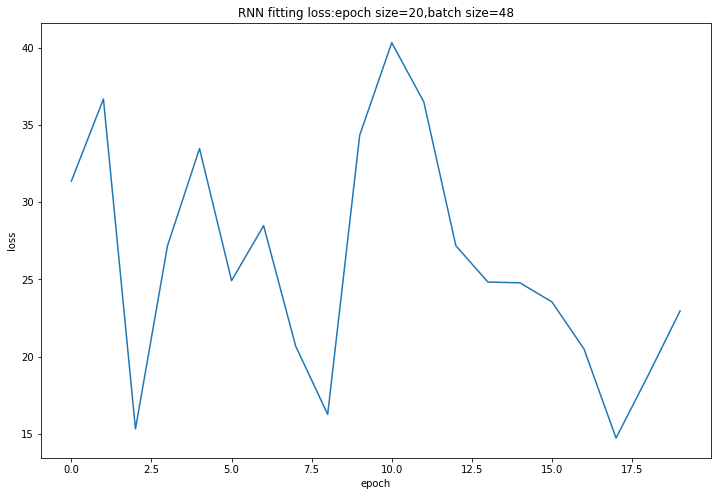

epoch size=20,batch size=48
RMSE for RNN : 4.1553729691069785
R squared for RNN : 0.9535513466623616


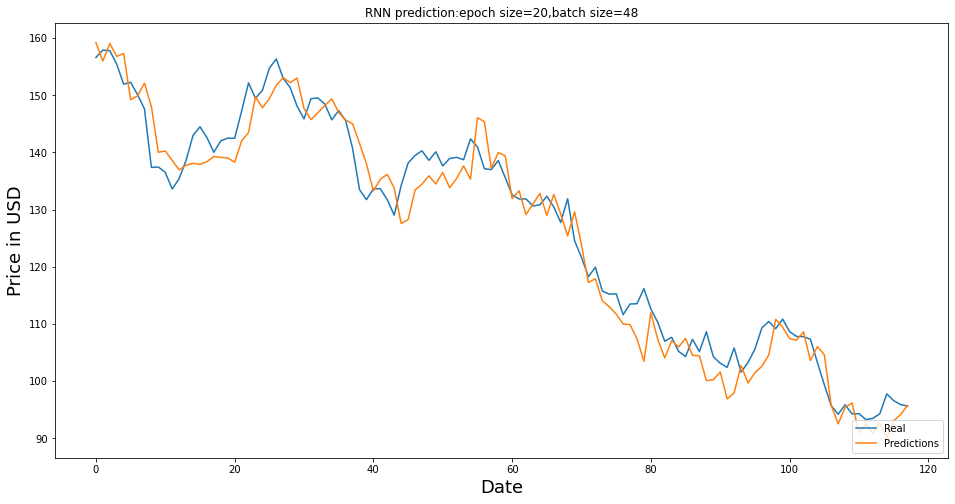

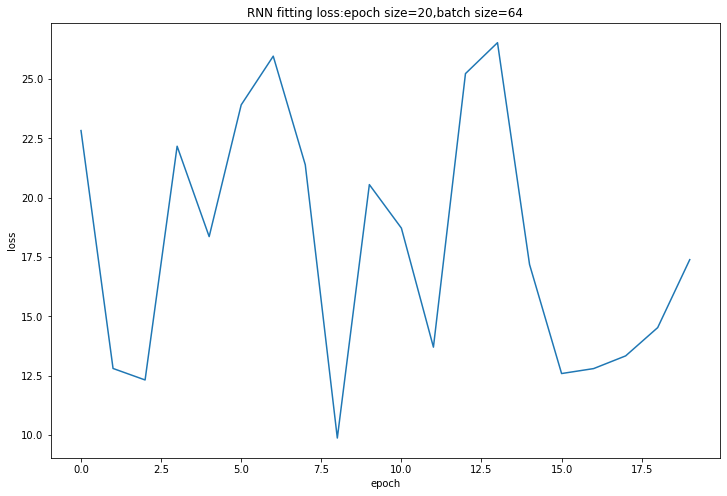

epoch size=20,batch size=64
RMSE for RNN : 4.371918186027947
R squared for RNN : 0.9485841335451489


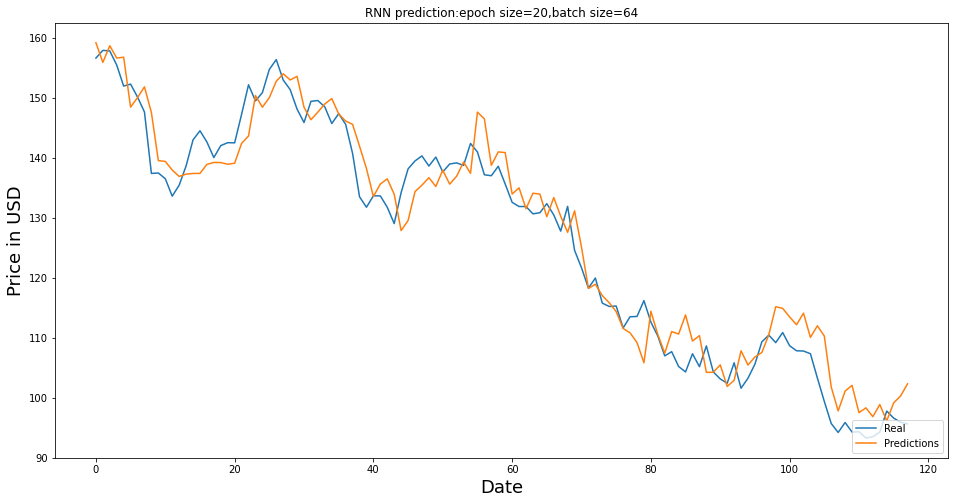

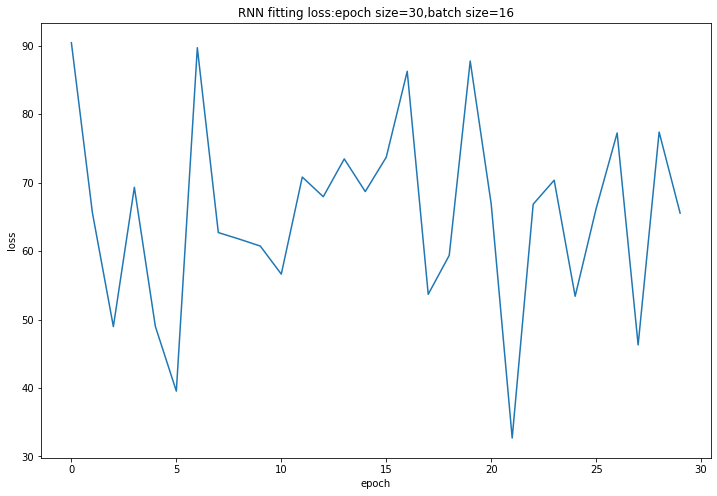

epoch size=30,batch size=16
RMSE for RNN : 5.506466832401195
R squared for RNN : 0.9184358787039051


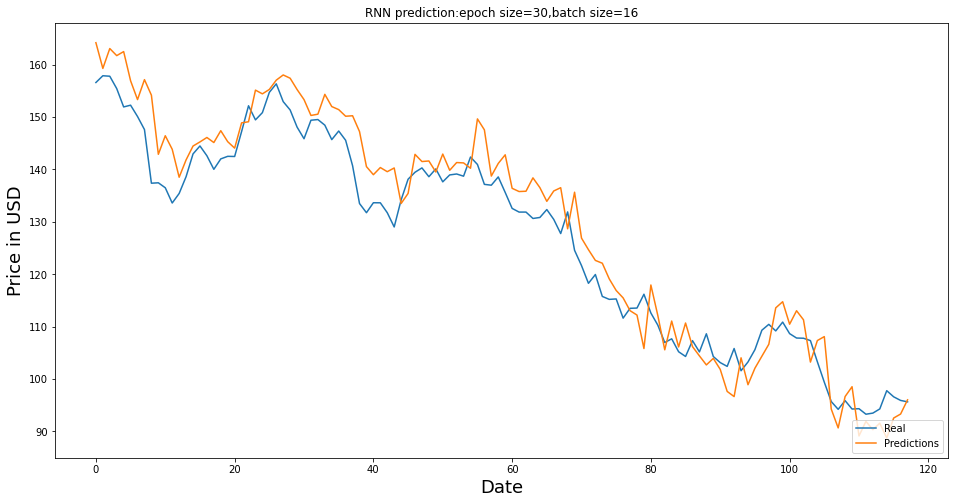

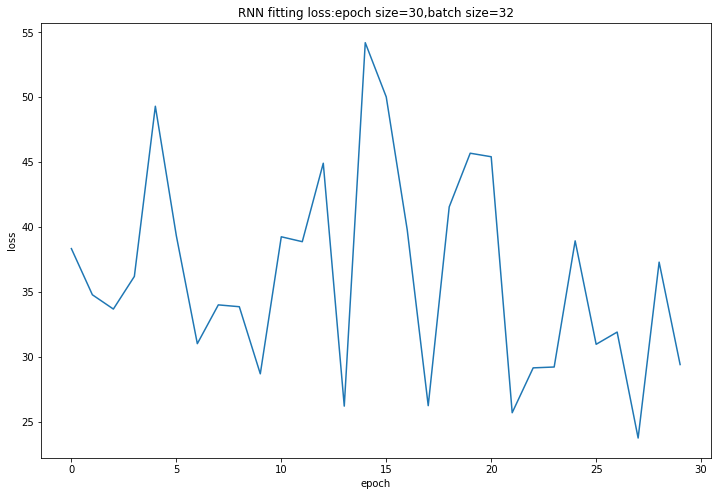

epoch size=30,batch size=32
RMSE for RNN : 5.0642764096998265
R squared for RNN : 0.9310097196604685


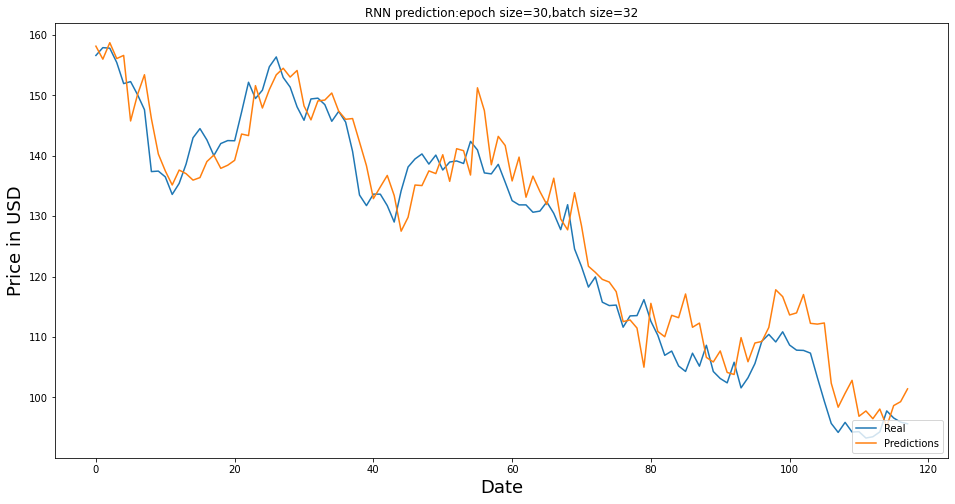

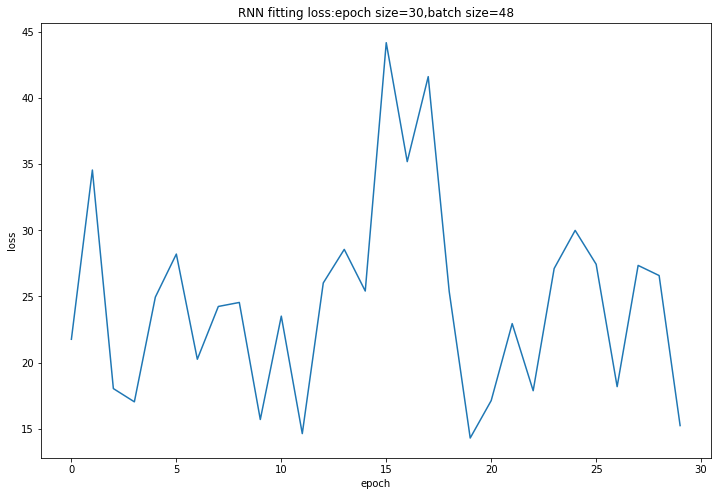

epoch size=30,batch size=48
RMSE for RNN : 4.376313715923219
R squared for RNN : 0.9484806944693255


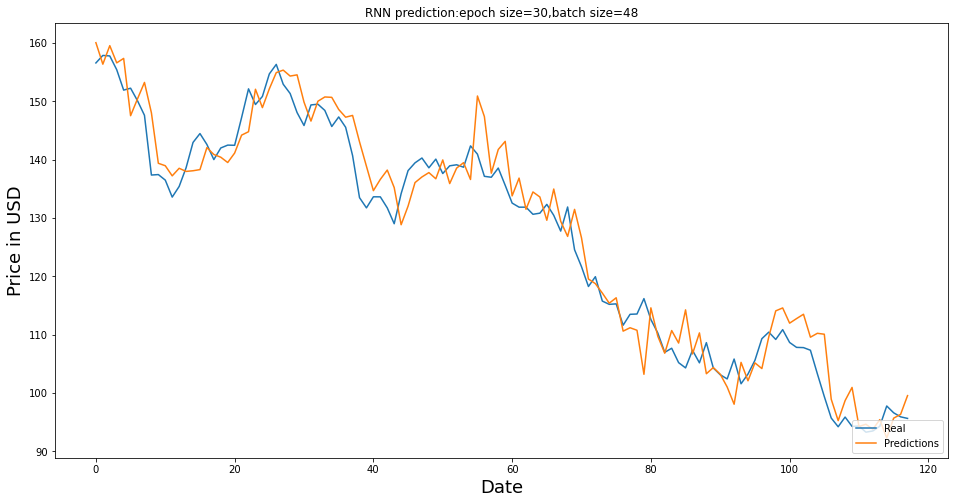

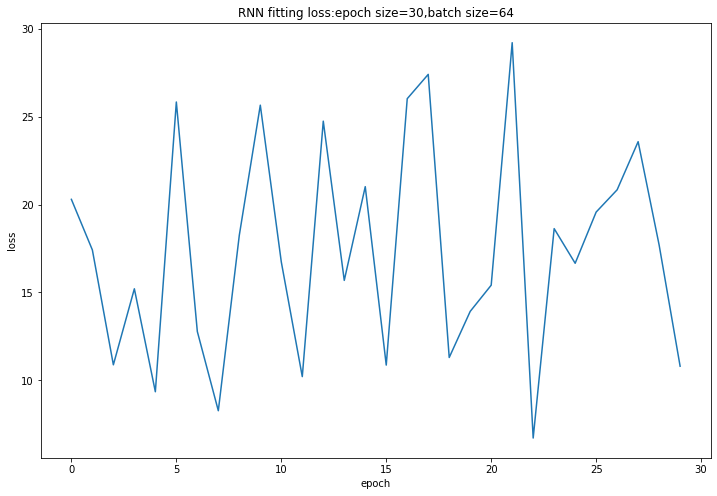

epoch size=30,batch size=64
RMSE for RNN : 4.606374593780001
R squared for RNN : 0.9429216236143729


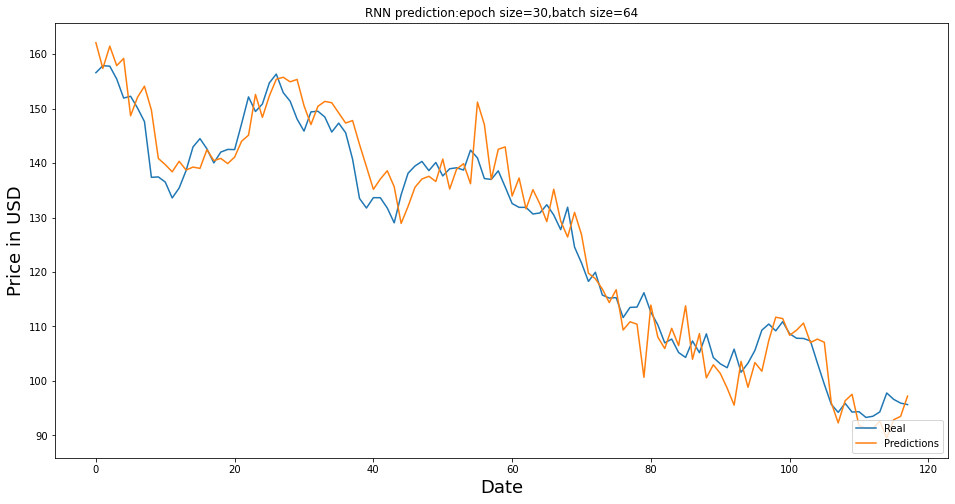

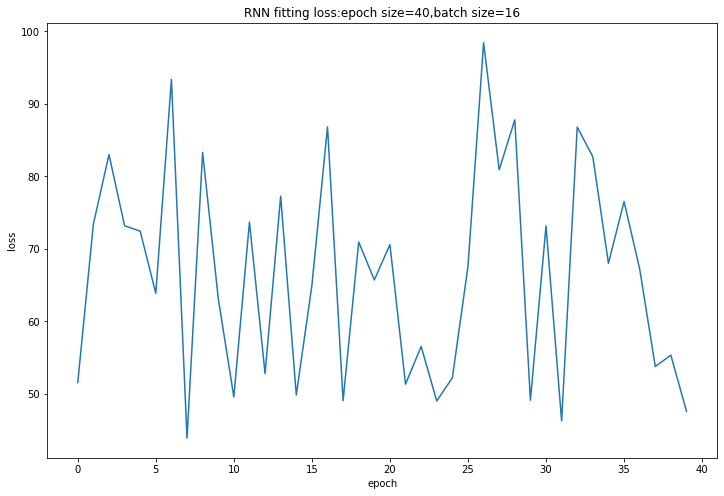

epoch size=40,batch size=16
RMSE for RNN : 5.578264511103319
R squared for RNN : 0.9162950166646415


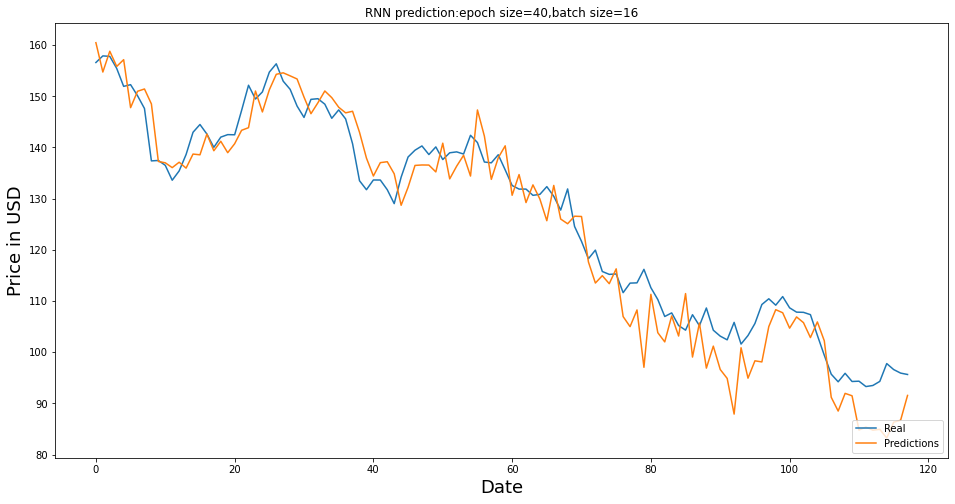

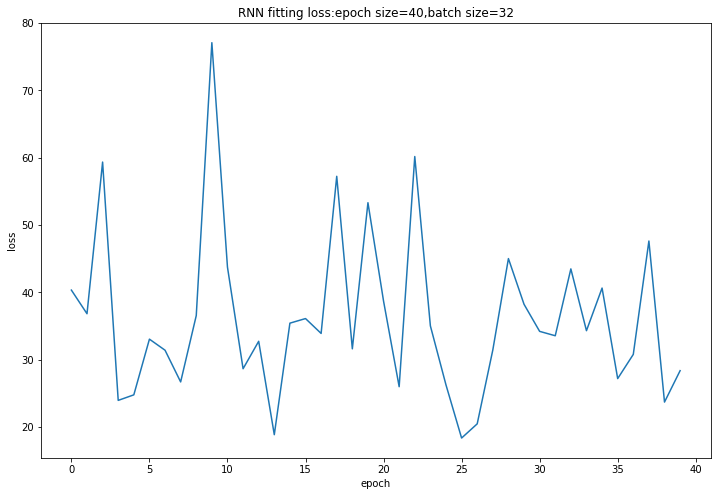

epoch size=40,batch size=32
RMSE for RNN : 5.258245622216156
R squared for RNN : 0.9256236529563813


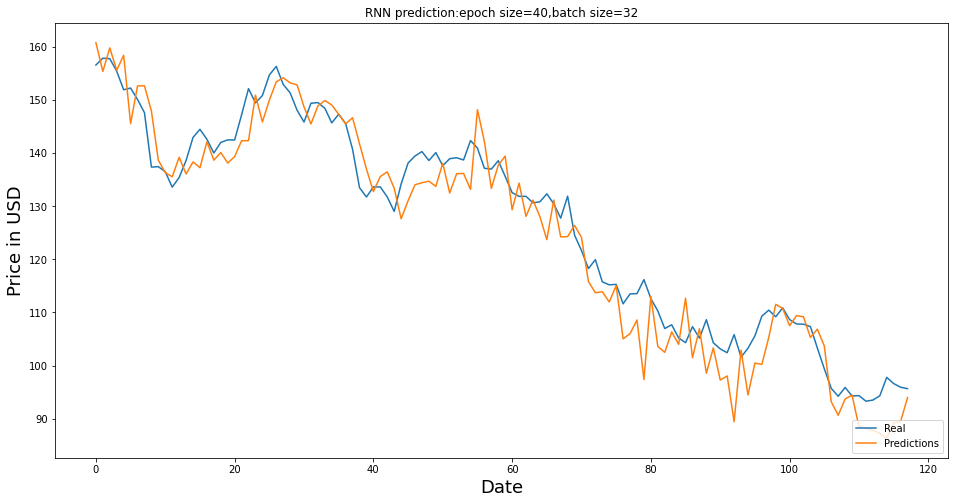

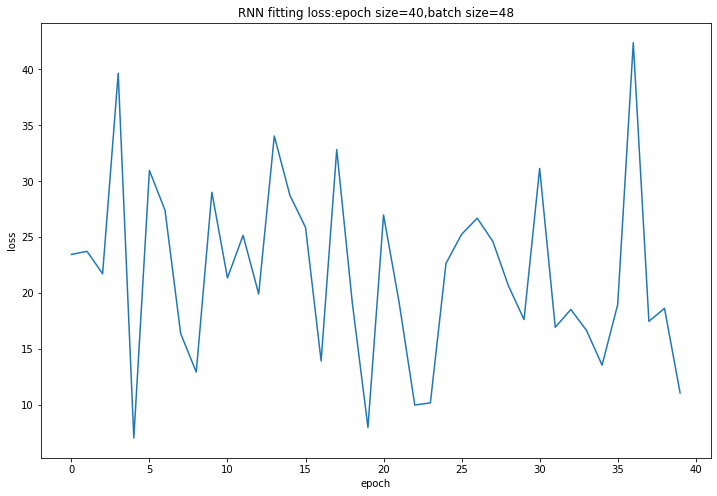

epoch size=40,batch size=48
RMSE for RNN : 5.019718642132944
R squared for RNN : 0.9322183935883904


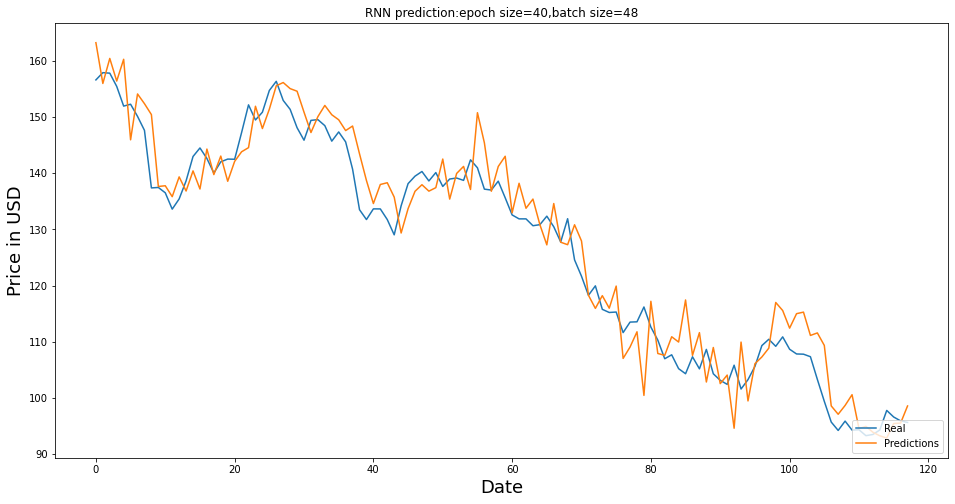

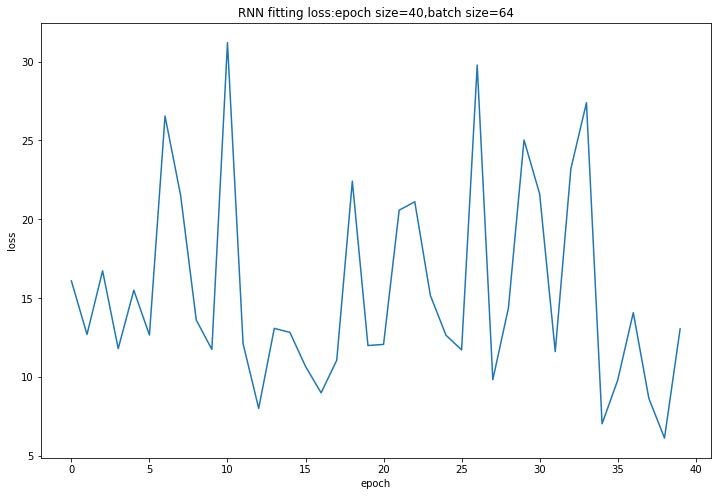

epoch size=40,batch size=64
RMSE for RNN : 4.762435703740352
R squared for RNN : 0.9389885484765279


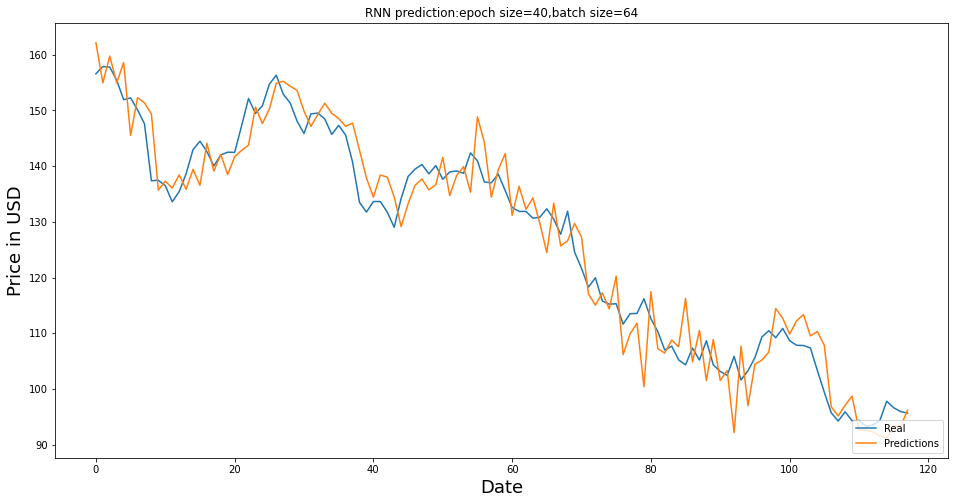

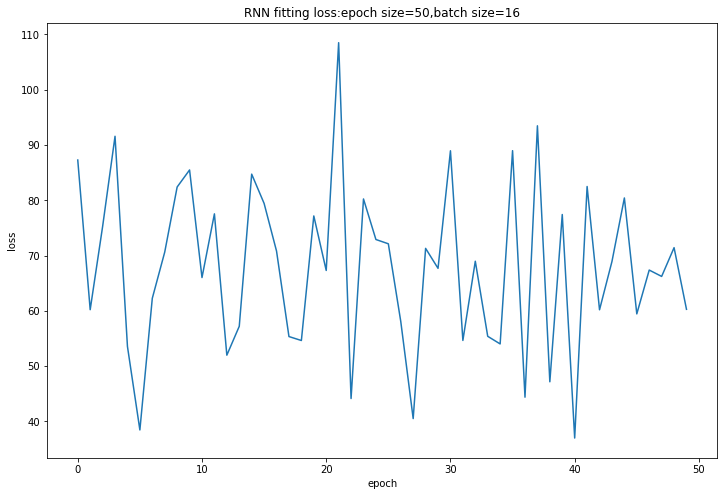

epoch size=50,batch size=16
RMSE for RNN : 4.9250187318878025
R squared for RNN : 0.9347517482415825


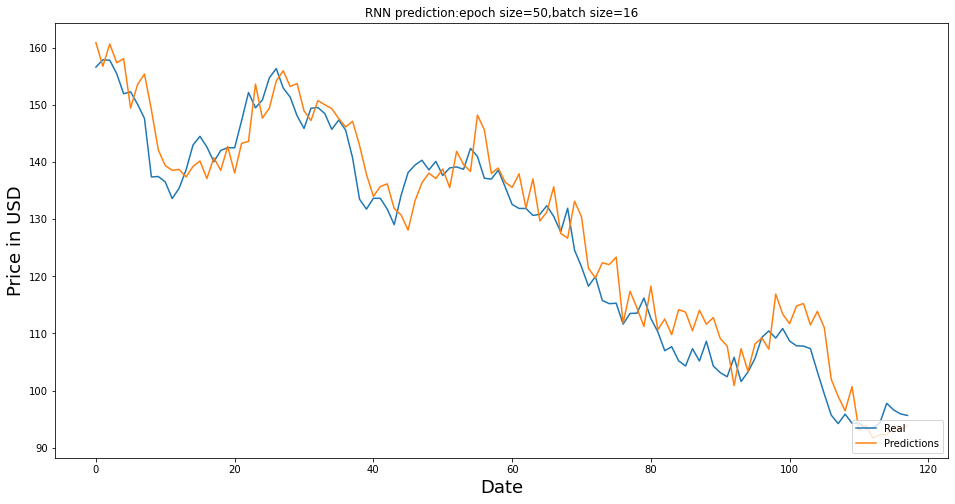

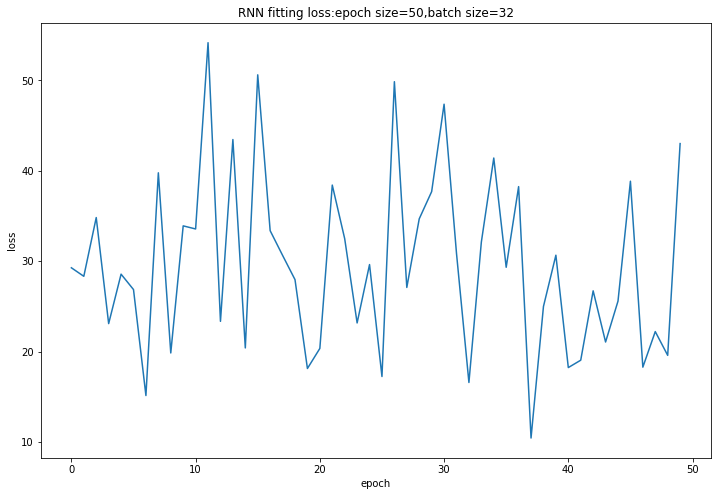

epoch size=50,batch size=32
RMSE for RNN : 4.737839077967929
R squared for RNN : 0.9396171346253543


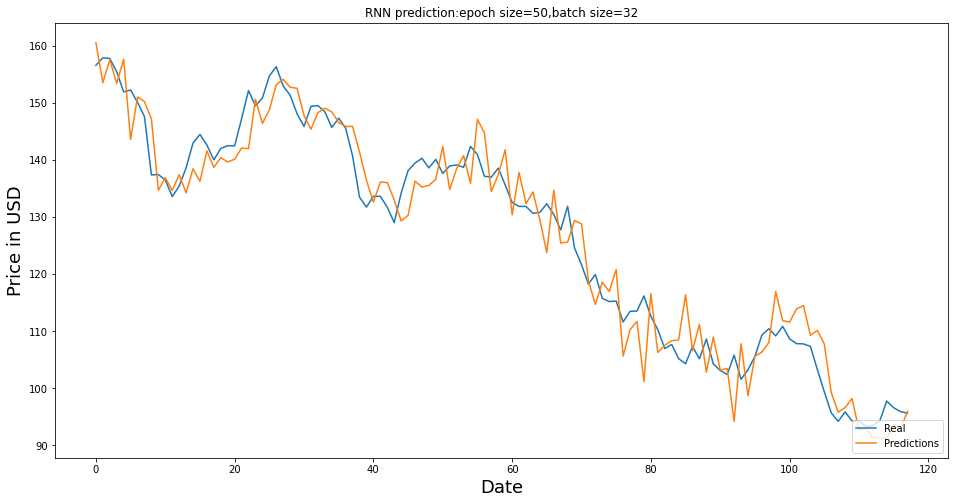

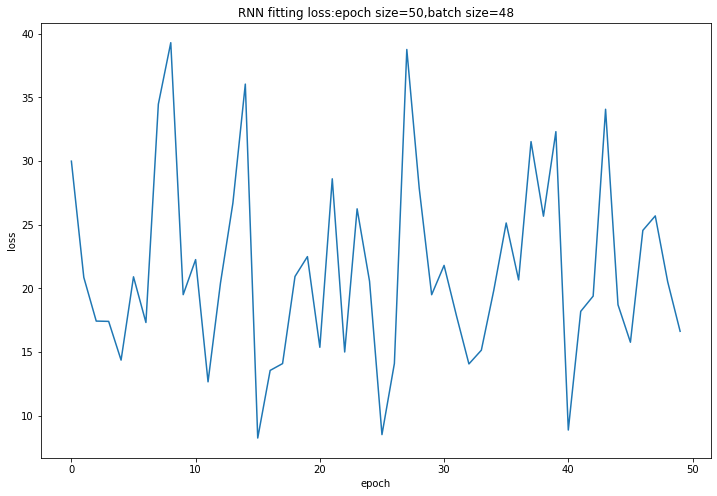

epoch size=50,batch size=48
RMSE for RNN : 5.880262305070808
R squared for RNN : 0.9069863889313936


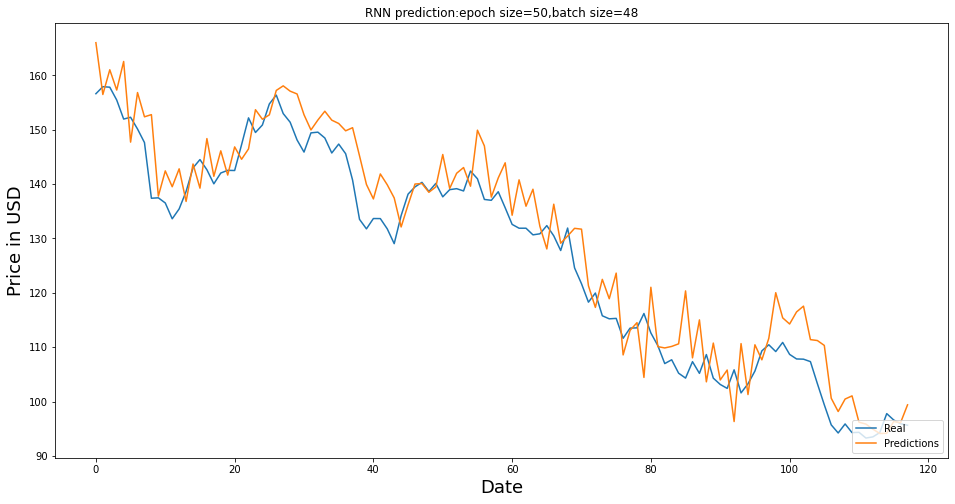

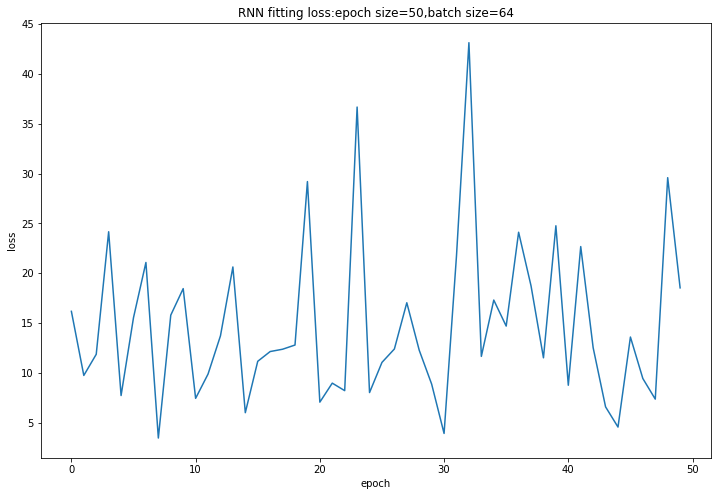

epoch size=50,batch size=64
RMSE for RNN : 5.149855236449993
R squared for RNN : 0.9286583501325734


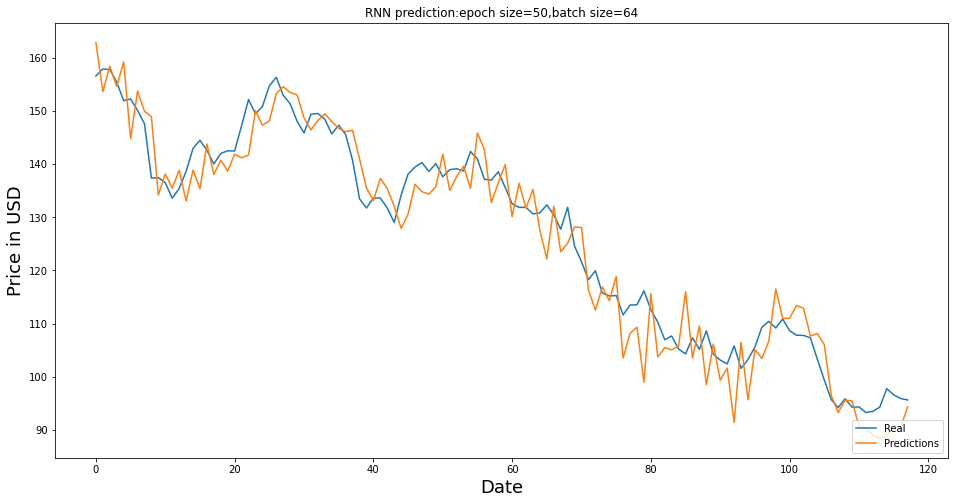

In [54]:
rnn_result = evaluate_deep(rnn,'RNN', rnn_result)

In [55]:

rnn_result.to_csv('rnn_result.csv')
rnn_result

RMSE  R squared
epoch size=10,batch size=16  23.393433  -0.472113
epoch size=10,batch size=32   7.800817   0.836306
epoch size=10,batch size=48   5.640644   0.914412
epoch size=10,batch size=64   4.614795   0.942713
epoch size=20,batch size=16   5.600152   0.915637
epoch size=20,batch size=32   5.391303   0.921812
epoch size=20,batch size=48   4.155373   0.953551
epoch size=20,batch size=64   4.371918   0.948584
epoch size=30,batch size=16   5.506467   0.918436
epoch size=30,batch size=32   5.064276   0.931010
epoch size=30,batch size=48   4.376314   0.948481
epoch size=30,batch size=64   4.606375   0.942922
epoch size=40,batch size=16   5.578265   0.916295
epoch size=40,batch size=32   5.258246   0.925624
epoch size=40,batch size=48   5.019719   0.932218
epoch size=40,batch size=64   4.762436   0.938989
epoch size=50,batch size=16   4.925019   0.934752
epoch size=50,batch size=32   4.737839   0.939617
epoch size=50,batch size=48   5.880262   0.906986
epoch size=50,batch size=64   5.149855   0.928658

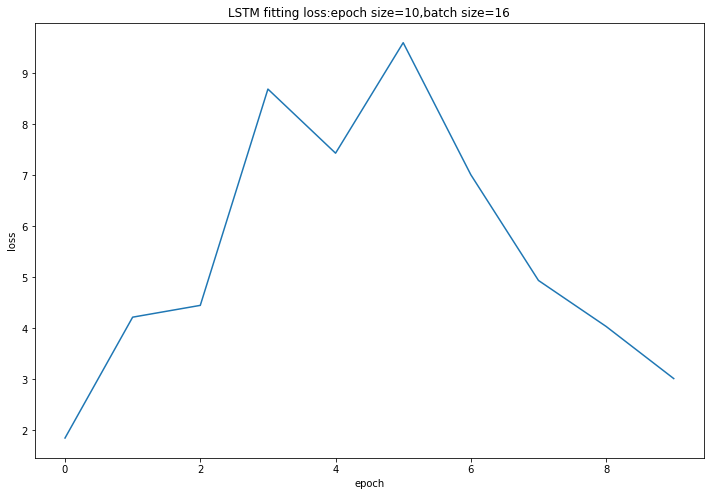

epoch size=10,batch size=16
RMSE for LSTM : 5.987840387687214
R squared for LSTM : 0.9035519309960327


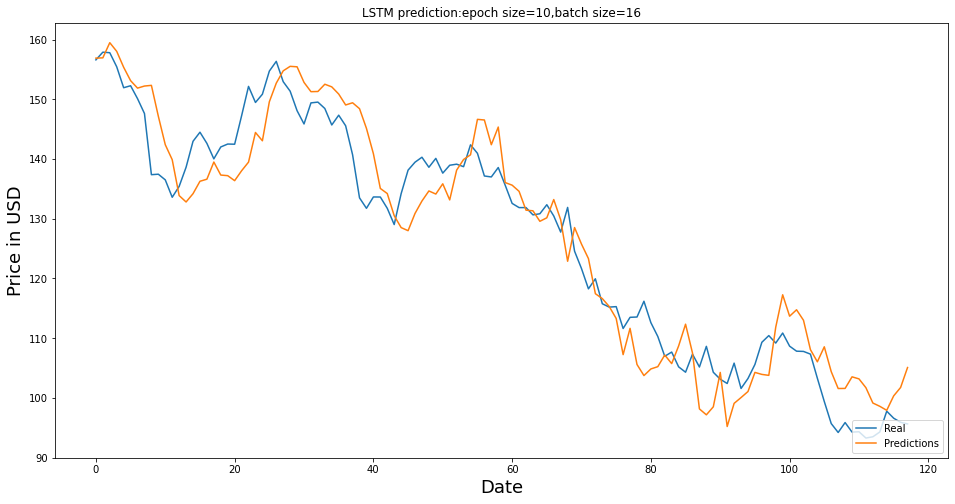

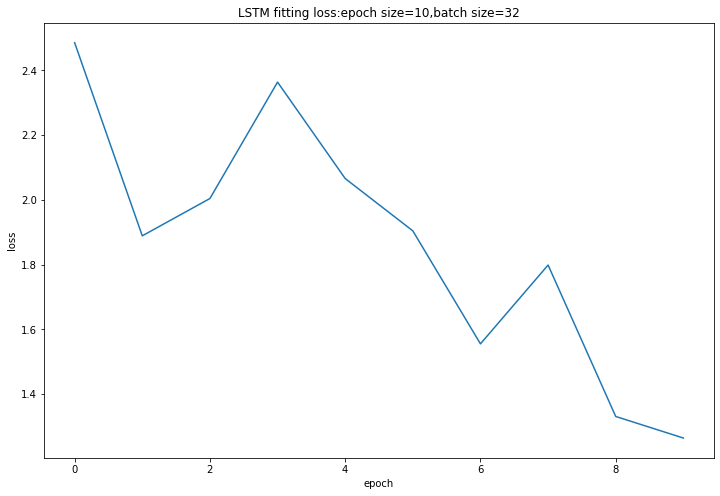

epoch size=10,batch size=32
RMSE for LSTM : 6.890853251508576
R squared for LSTM : 0.8722681774496266


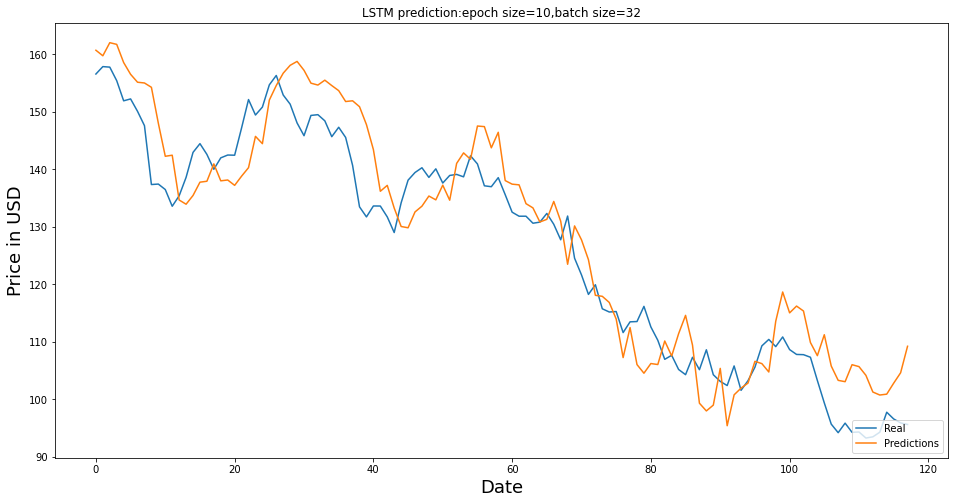

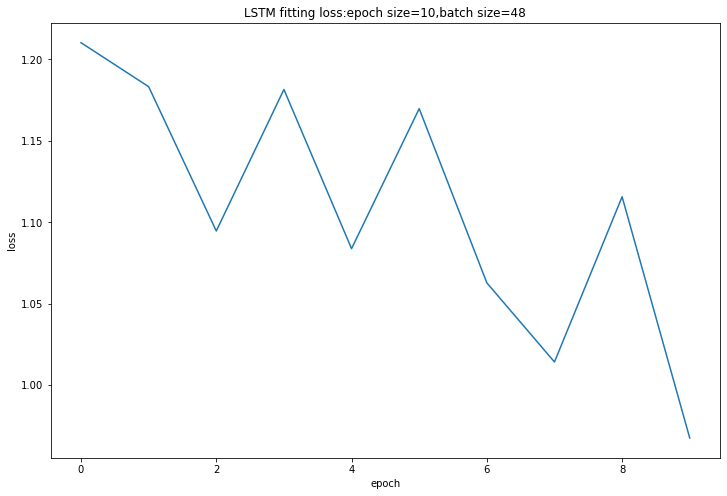

epoch size=10,batch size=48
RMSE for LSTM : 6.750729376867354
R squared for LSTM : 0.8774101529396402


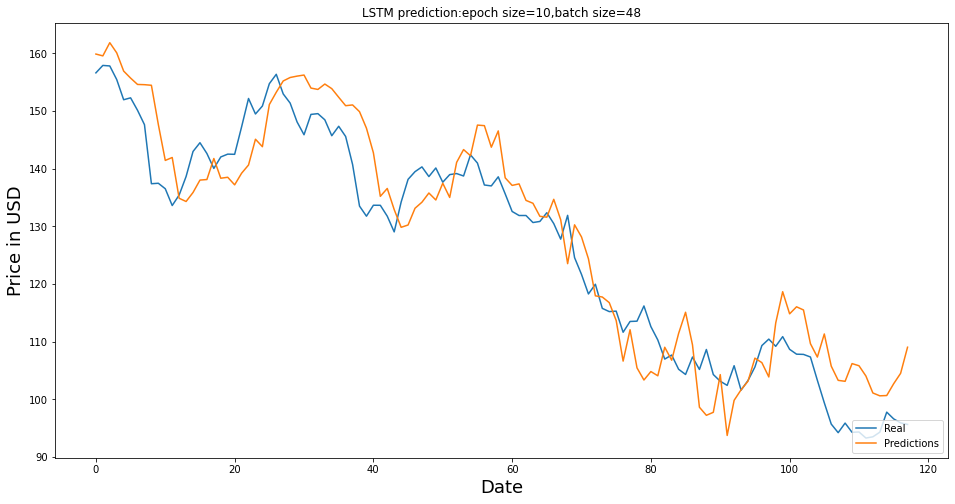

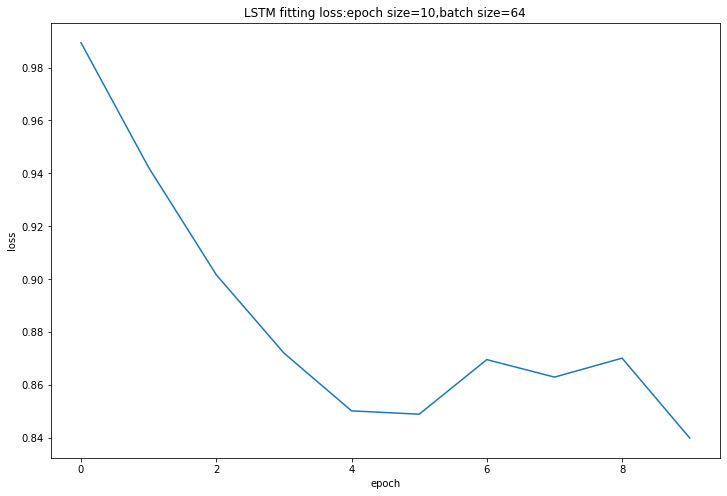

epoch size=10,batch size=64
RMSE for LSTM : 6.908580038785599
R squared for LSTM : 0.87161014942358


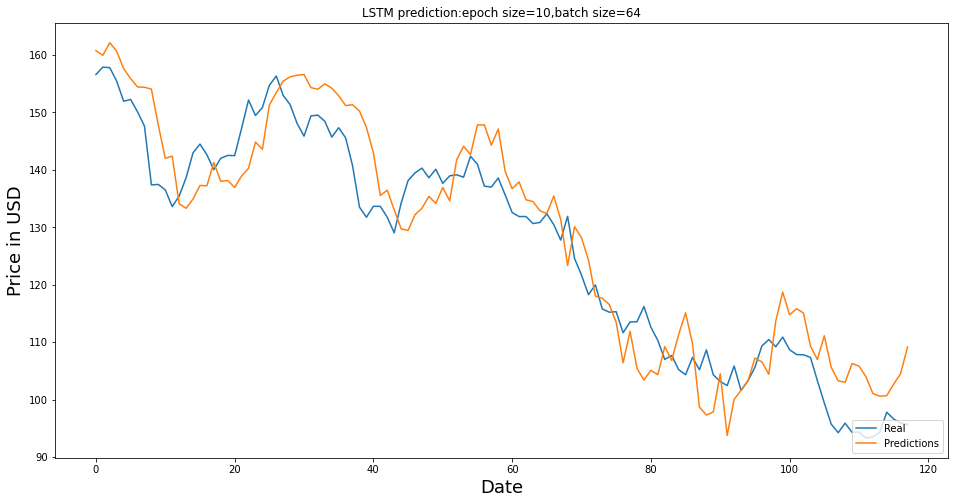

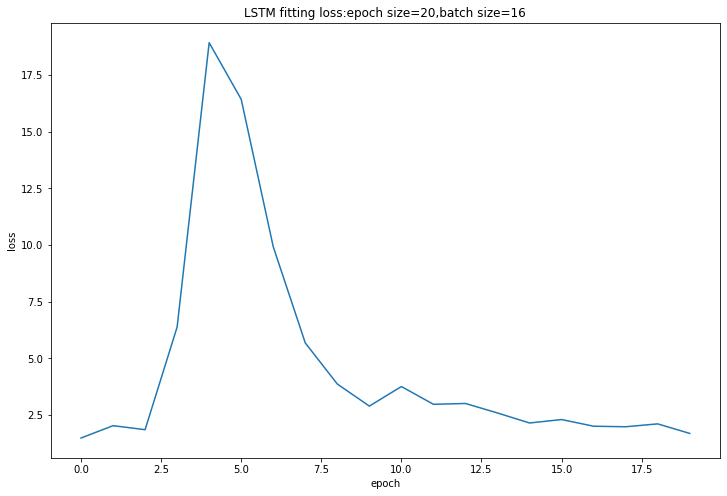

epoch size=20,batch size=16
RMSE for LSTM : 6.982978966947674
R squared for LSTM : 0.8688299831320554


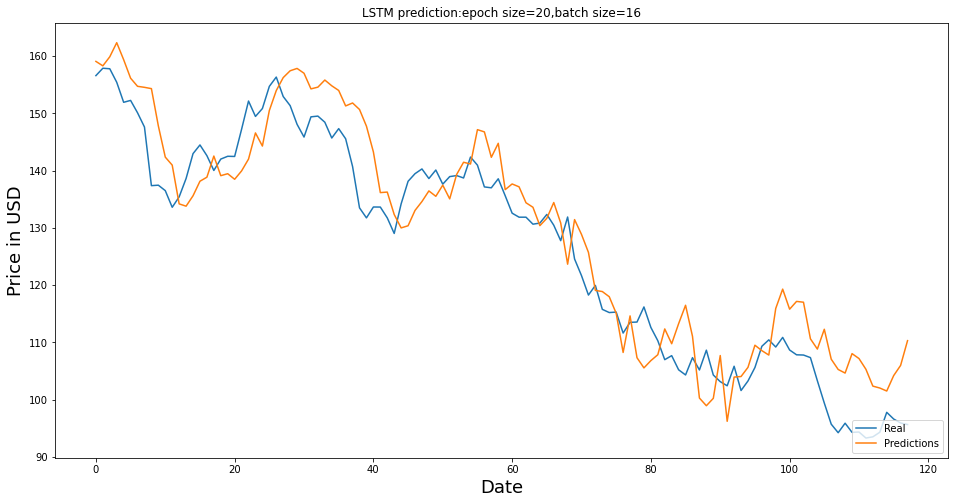

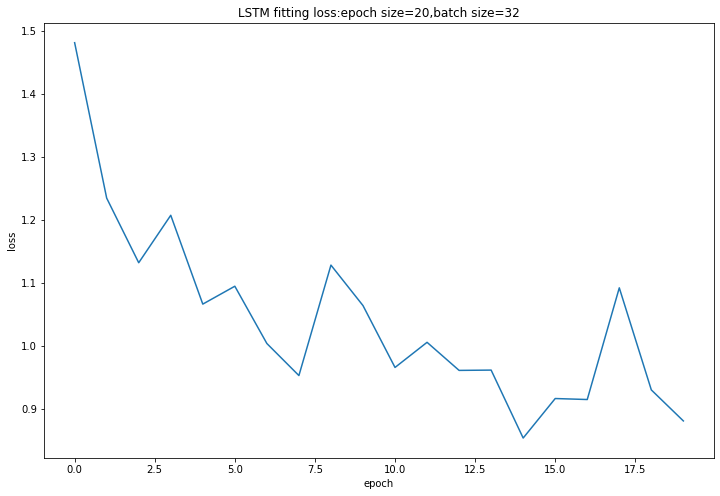

epoch size=20,batch size=32
RMSE for LSTM : 6.936501196766916
R squared for LSTM : 0.8705702722603359


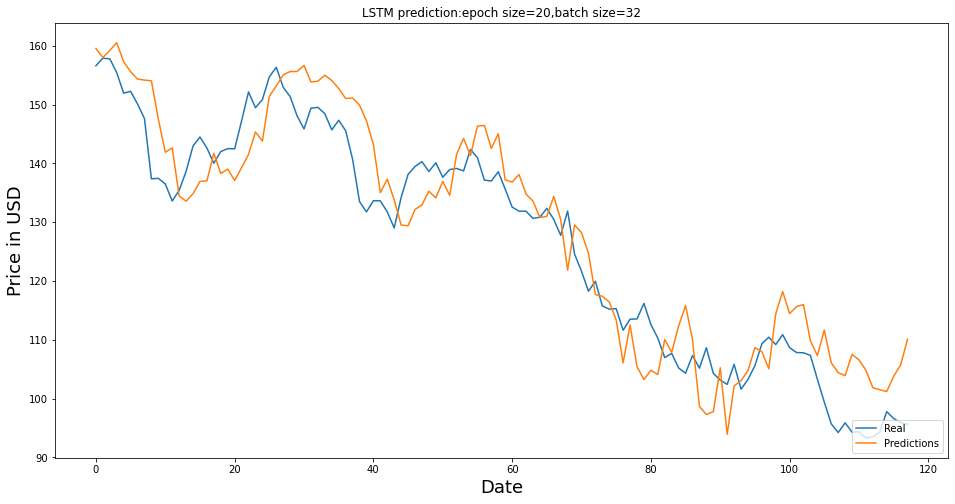

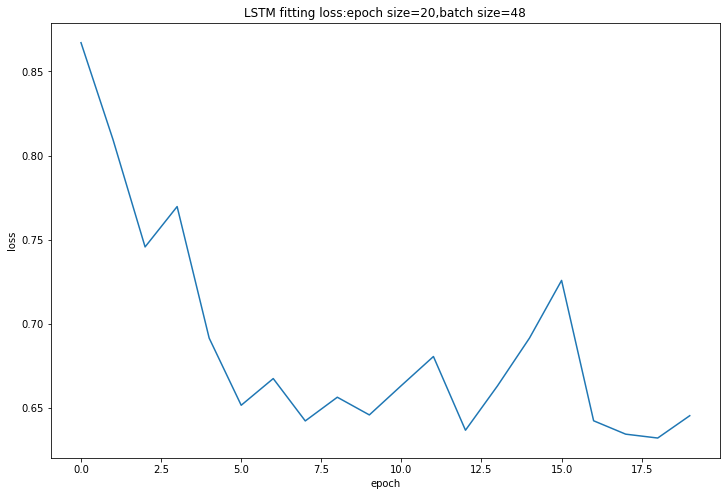

epoch size=20,batch size=48
RMSE for LSTM : 6.86485504379877
R squared for LSTM : 0.8732301871988062


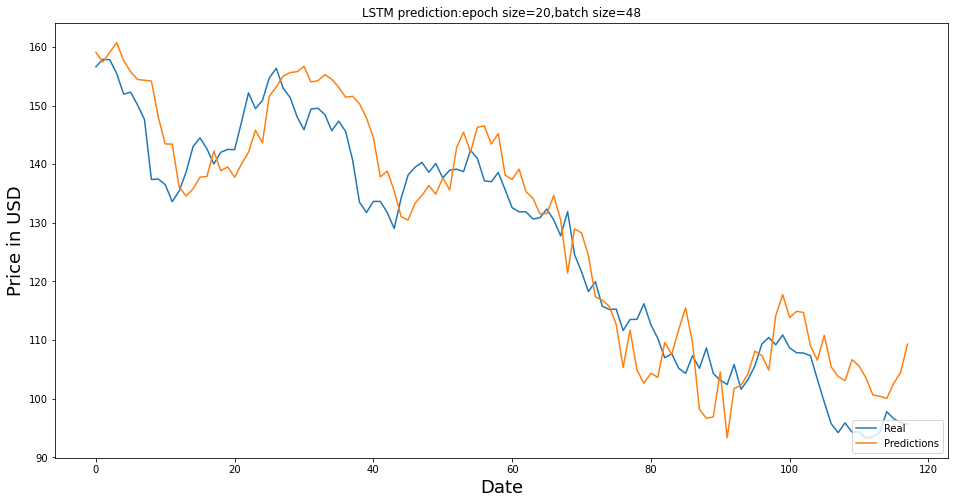

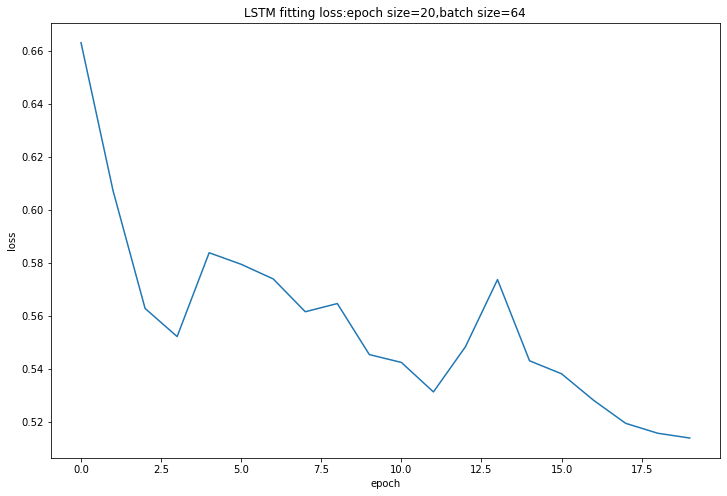

epoch size=20,batch size=64
RMSE for LSTM : 7.0474330864635375
R squared for LSTM : 0.8663973634715011


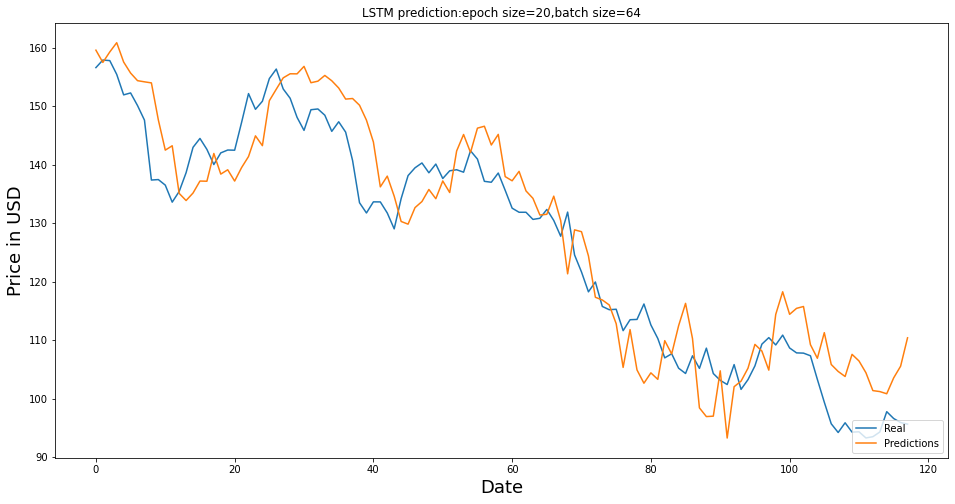

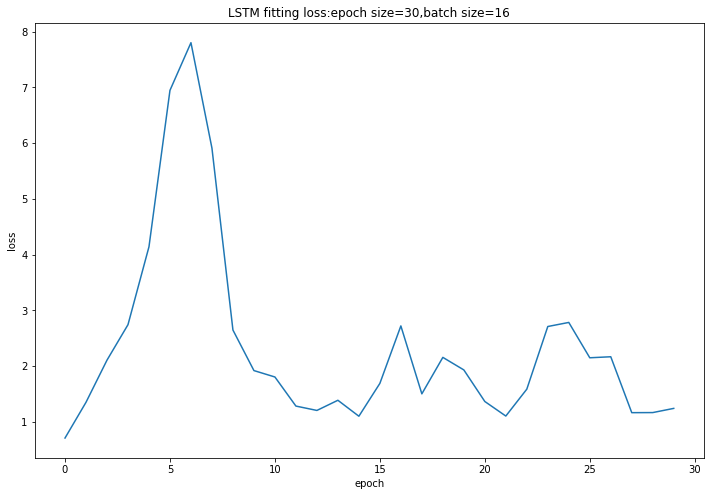

epoch size=30,batch size=16
RMSE for LSTM : 6.726456383684691
R squared for LSTM : 0.8782901387208509


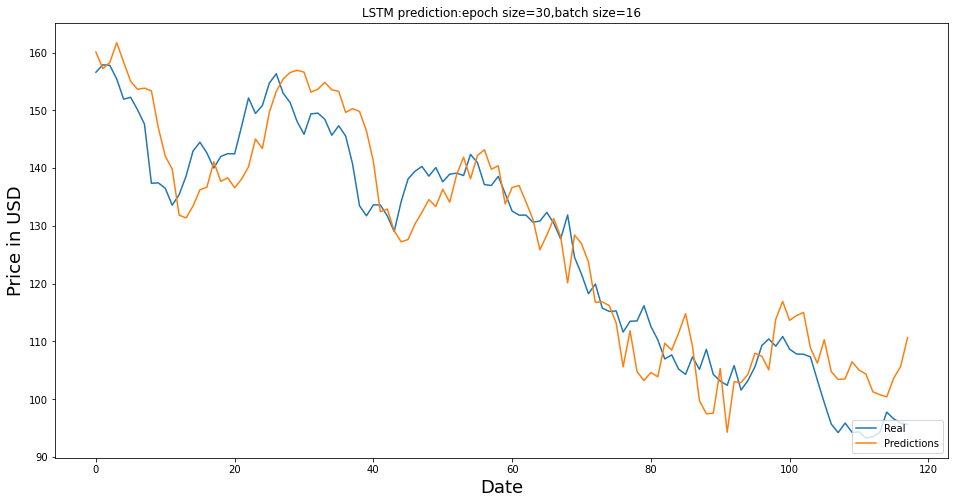

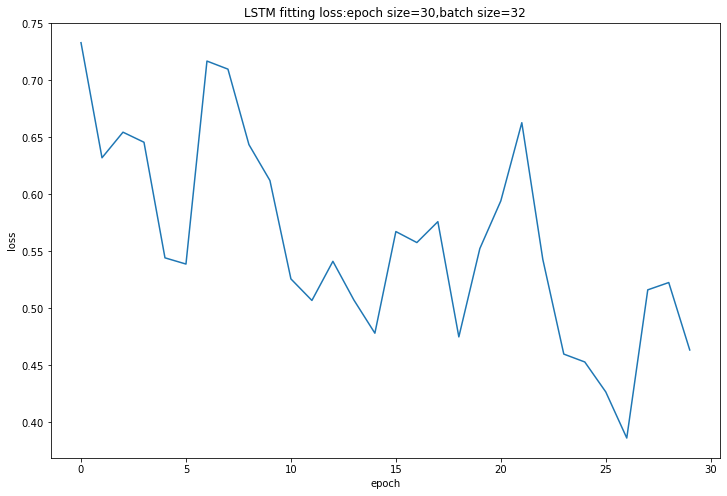

epoch size=30,batch size=32
RMSE for LSTM : 6.931014957634474
R squared for LSTM : 0.8707749292211827


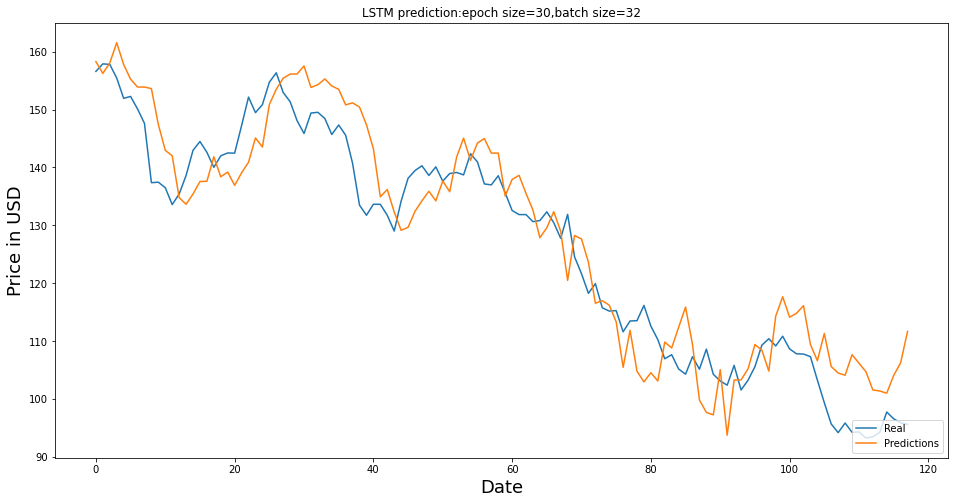

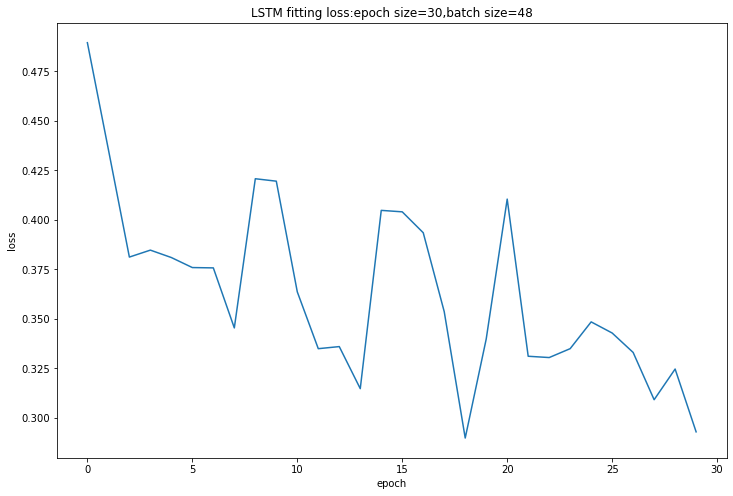

epoch size=30,batch size=48
RMSE for LSTM : 6.961497725902903
R squared for LSTM : 0.8696357598146506


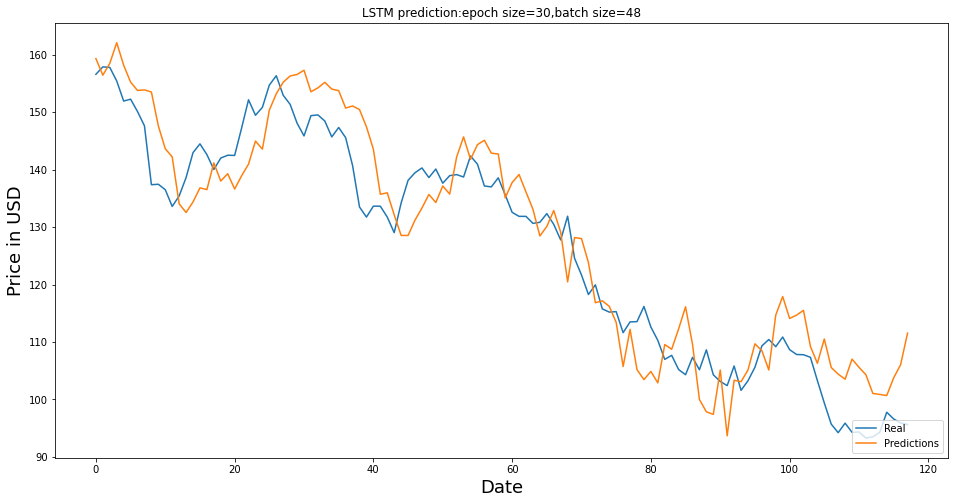

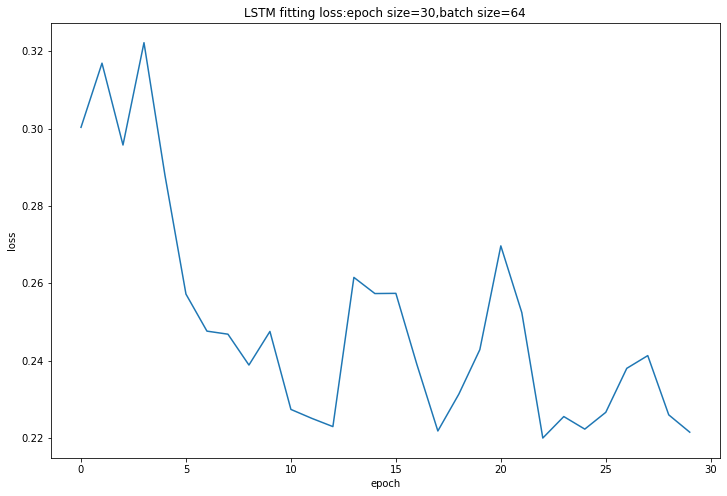

epoch size=30,batch size=64
RMSE for LSTM : 7.017583358171531
R squared for LSTM : 0.8675267269337664


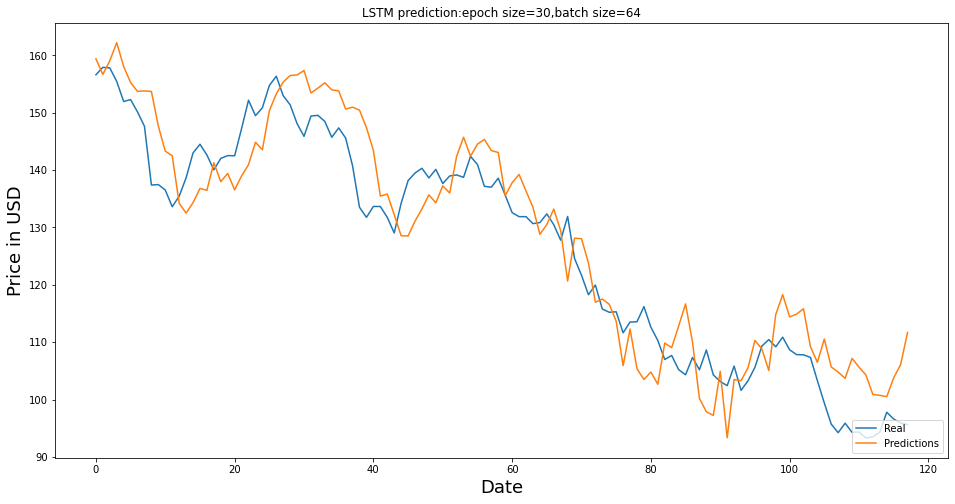

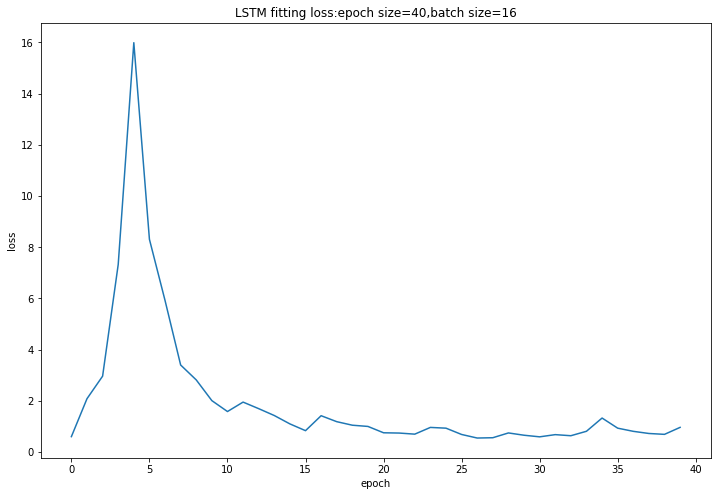

epoch size=40,batch size=16
RMSE for LSTM : 6.908975794967459
R squared for LSTM : 0.8715954394449394


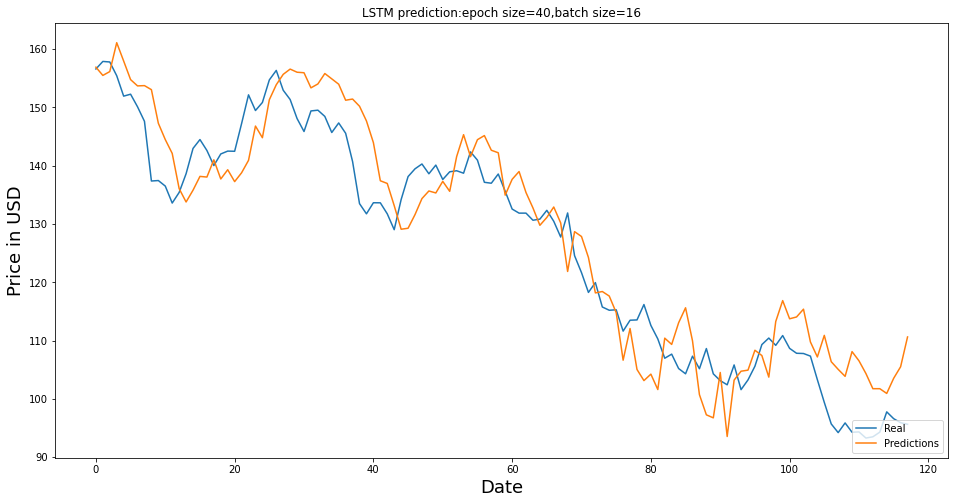

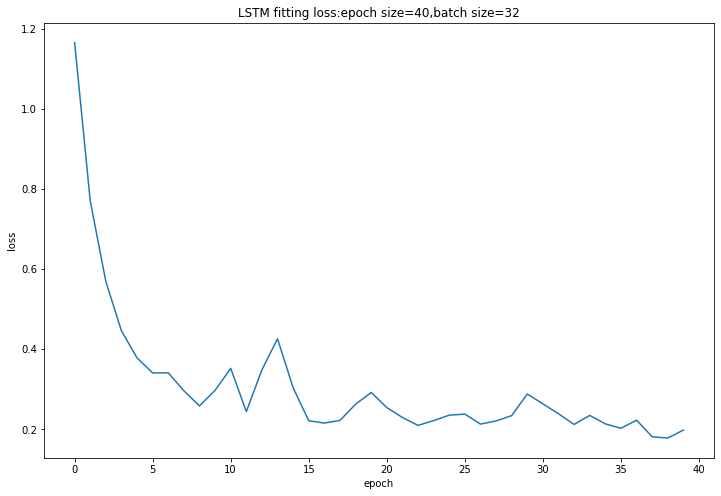

epoch size=40,batch size=32
RMSE for LSTM : 7.080694450405619
R squared for LSTM : 0.8651332741357276


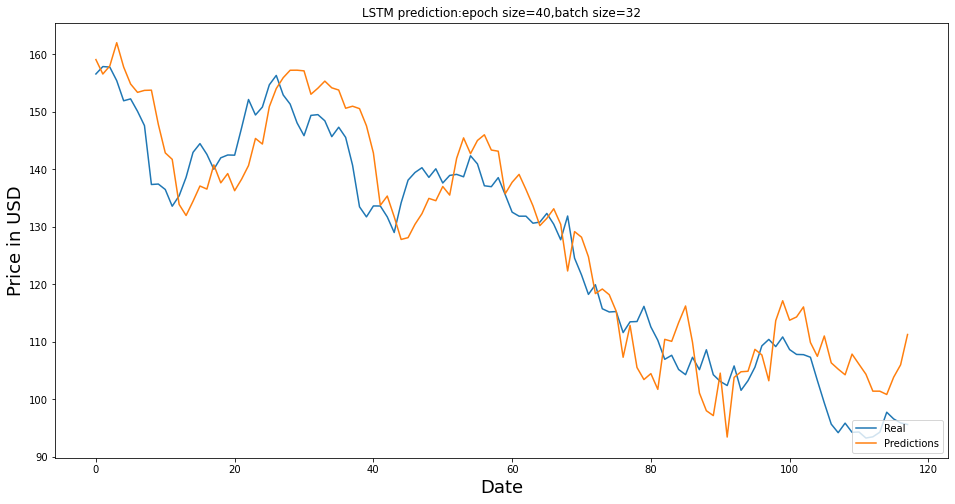

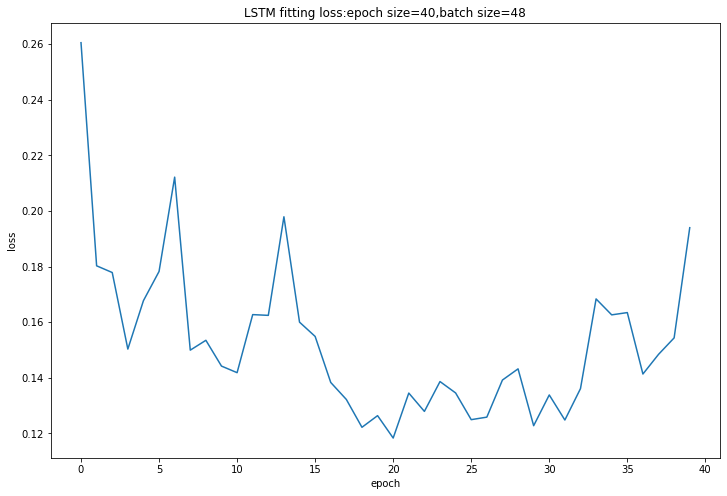

epoch size=40,batch size=48
RMSE for LSTM : 7.08731188508199
R squared for LSTM : 0.8648810704019745


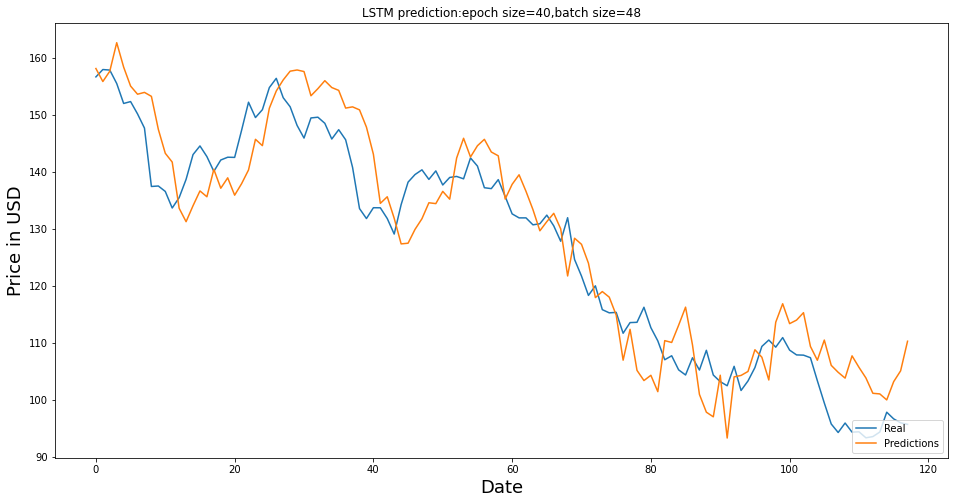

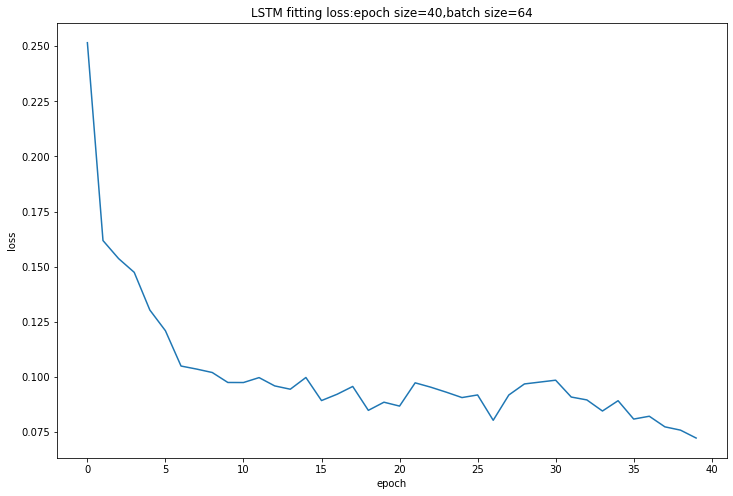

epoch size=40,batch size=64
RMSE for LSTM : 7.097835515931795
R squared for LSTM : 0.8644795084423293


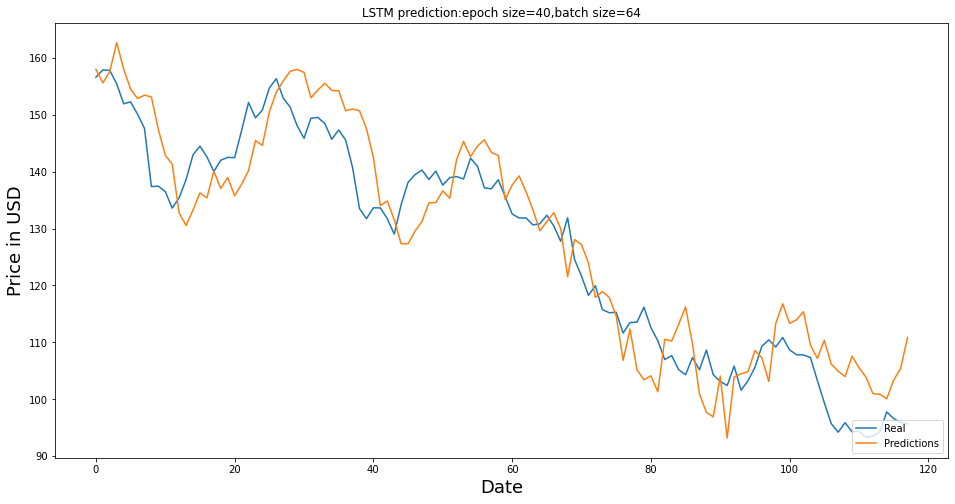

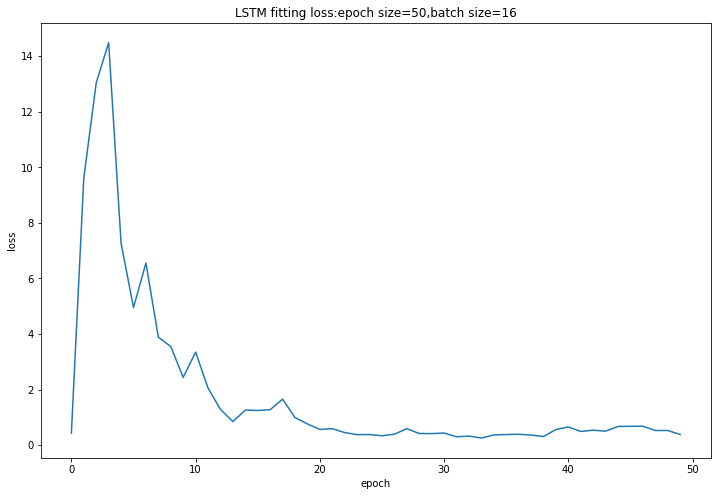

epoch size=50,batch size=16
RMSE for LSTM : 6.922222653566338
R squared for LSTM : 0.871102576894971


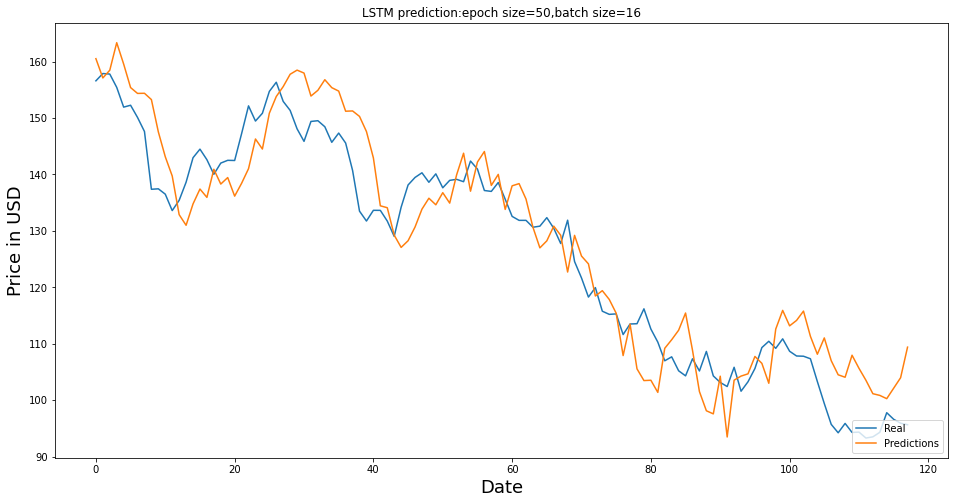

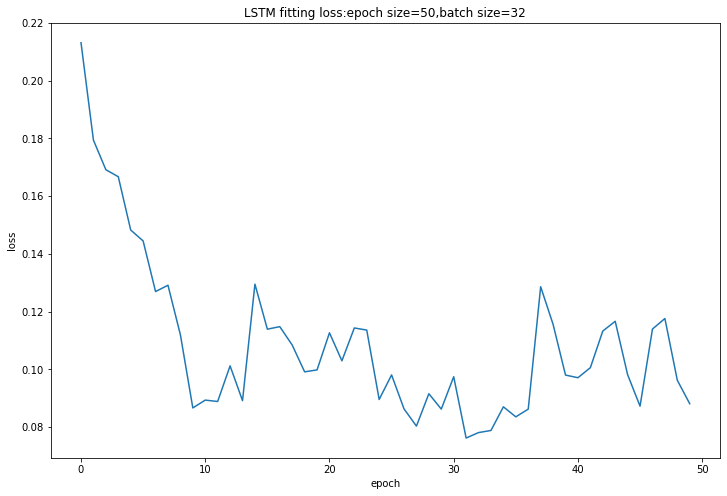

epoch size=50,batch size=32
RMSE for LSTM : 6.869104442637185
R squared for LSTM : 0.8730731956177218


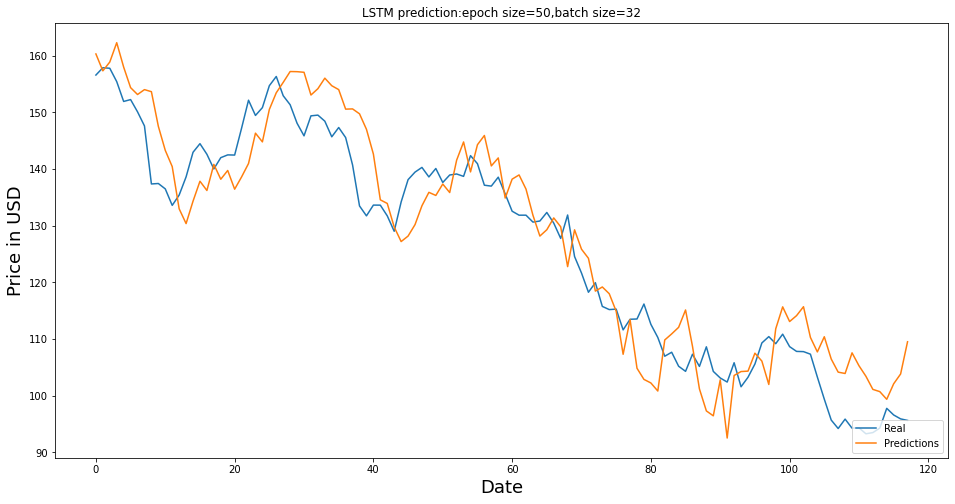

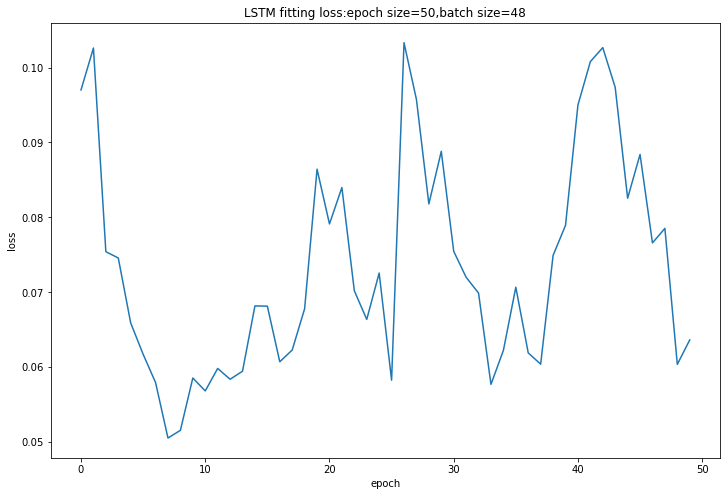

epoch size=50,batch size=48
RMSE for LSTM : 6.92651121594858
R squared for LSTM : 0.870942814372899


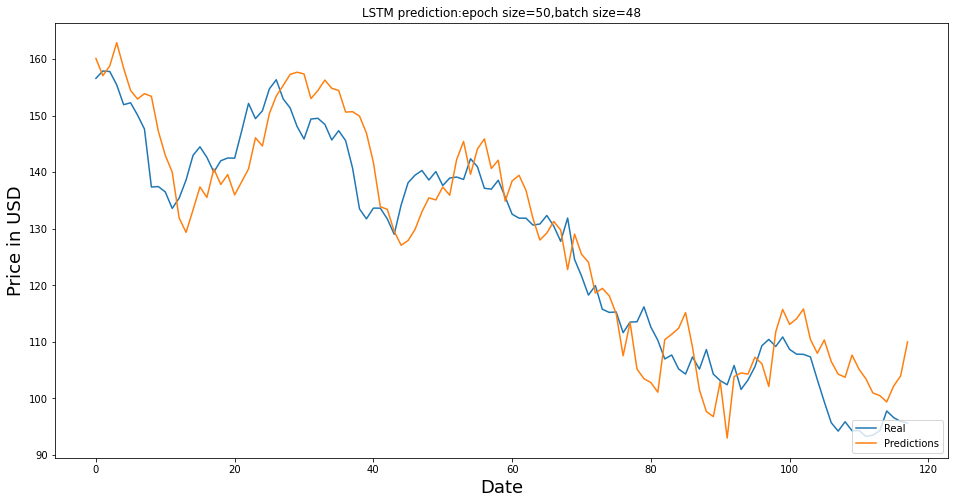

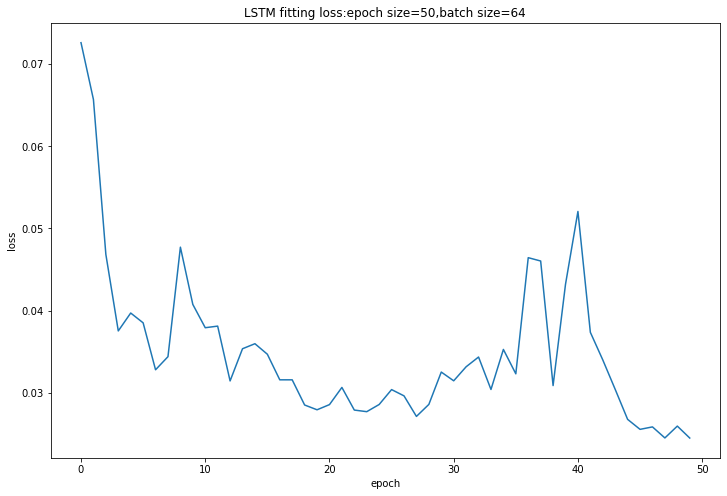

epoch size=50,batch size=64
RMSE for LSTM : 7.029905687365393
R squared for LSTM : 0.8670610930076442


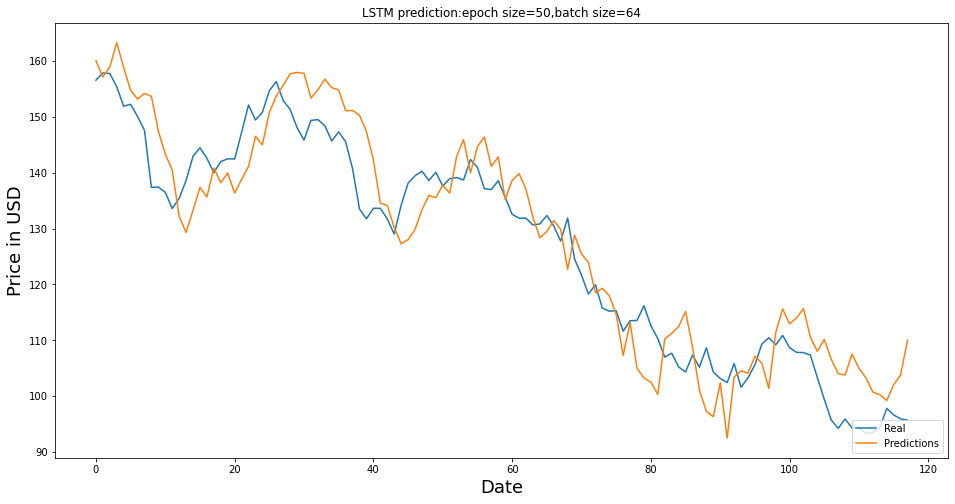

In [58]:
lstm_result = evaluate_deep(lstm,'LSTM',lstm_result)

In [59]:

lstm_result.to_csv('lstm_result.csv')
lstm_result

RMSE  R squared
epoch size=10,batch size=16  5.987840   0.903552
epoch size=10,batch size=32  6.890853   0.872268
epoch size=10,batch size=48  6.750729   0.877410
epoch size=10,batch size=64  6.908580   0.871610
epoch size=20,batch size=16  6.982979   0.868830
epoch size=20,batch size=32  6.936501   0.870570
epoch size=20,batch size=48  6.864855   0.873230
epoch size=20,batch size=64  7.047433   0.866397
epoch size=30,batch size=16  6.726456   0.878290
epoch size=30,batch size=32  6.931015   0.870775
epoch size=30,batch size=48  6.961498   0.869636
epoch size=30,batch size=64  7.017583   0.867527
epoch size=40,batch size=16  6.908976   0.871595
epoch size=40,batch size=32  7.080694   0.865133
epoch size=40,batch size=48  7.087312   0.864881
epoch size=40,batch size=64  7.097836   0.864480
epoch size=50,batch size=16  6.922223   0.871103
epoch size=50,batch size=32  6.869104   0.873073
epoch size=50,batch size=48  6.926511   0.870943
epoch size=50,batch size=64  7.029906   0.867061

## 6.3 Feature importance

In [60]:
#obtain the best model

best_model = rnn
rnn.fit(X_train,y_train,epochs = 20, batch_size=48,verbose=0)
best_r2 = 0.953551

In [113]:
y_test.shape

(118, 1)

In [132]:
#set each feature to 0, and then calculate r^2
def new_r2(model, test,test_labels, column_testdata):
    dict_col = {}
    
    for col in range(len(column_testdata)):
        df_test_use = test.copy()
        
        #df_test_use = pd.DataFrame(df_test_use, columns= column_testdata)
        df_test_use[:,:,col] = 0
        df_test_use = np.array(df_test_use)
        #print(df_test_use.shape)
        #df_test_use = df_test_use.reshape(df_test_use.shape[0],df_test_use.shape[1],1)
        #
        preds = model.predict(df_test_use)
        
        score = r2_score(test_labels, preds)
        dict_col[col] = score

    return dict_col

In [133]:
column_testdata = DIS_df.columns.drop(['Close'])
#testx = testx.reshape(testx.shape[0],testx.shape[1],1)
#test_label = np.array(testy)
best_model_r2 = new_r2(best_model, X_test, y_test, column_testdata)
new_r2 = pd.DataFrame.from_dict(best_model_r2, orient='index',columns=['new_r2'])
new_r2['difference'] = new_r2['new_r2'] - best_r2
new_r2['feature'] = column_testdata
new_r2 = new_r2.sort_values(['difference'],ascending= True)
new_r2


new_r2  difference              feature
3   0.254616   -0.698935            Adj Close
2   0.573704   -0.379847                  Low
7   0.747795   -0.205756                EMA10
1   0.771080   -0.182471                 High
6   0.844278   -0.109273               SMA_50
13  0.847313   -0.106238    disneyland_Result
5   0.866590   -0.086961               SMA_20
9   0.877542   -0.076009  disneyland_Polarity
14  0.887420   -0.066131    disneyplus_Result
12  0.895257   -0.058294     disneyplus_Vader
11  0.900620   -0.052931     disneyland_Vader
0   0.909005   -0.044546                 Open
8   0.916811   -0.036740           SMA_volume
4   0.934049   -0.019502               Volume
10  0.935687   -0.017864  disneyplus_Polarity

In [134]:
new_r2.to_csv('new_r2.csv')